### ANÁLISIS EXPLORATORIO DE DATOS

In [16]:
import numpy as np 
import pandas as pd 
import os

In [17]:
data = pd.read_csv('master.csv')

In [18]:
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [19]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [20]:
data.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'HDI_for_year',
       'gdp_for_year($)', 'gdp_per_capita($)', 'generation']

In [21]:
data['year'] = data['year'].astype('object')

In [22]:
data['gdp_for_year($)'] = data['gdp_for_year($)'].str.replace(',','')

In [23]:
data['gdp_for_year($)'] = data['gdp_for_year($)'].astype('int64')

In [24]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year($),gdp_per_capita($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [25]:
data.dtypes

country               object
year                  object
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k_pop    float64
country-year          object
HDI_for_year         float64
gdp_for_year($)        int64
gdp_per_capita($)      int64
generation            object
dtype: object

In [26]:
# year: Periodo de tiempo

# age:

#   5-14 años
#   15-24 años
#   25-34 años
#   35-54 años
#   55-74 años
#   75+ años

# suicides_no: Número de suicidios. 

# suicides/100k pop: Suicidio por cada 100.000 personas.

# country-year: Combinación de país y año.

# HDI for year: Indíce de Desarrollo Humano (Salud, Educación e Ingresos)

# GDP: Valor monetario de todos los bienes y servicios (por año, per capita)

# generation: Generaciones

#   G.I. Generation: 1900 - 1924
#   Silent: 1925 - 1942
#   Boomers: 1946 - 1964
#   Generation X: 1965 - 1980
#   Millenials: 1981 - 2000
#   Generation Z: 2001 - 2010

#### Valores perdidos

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country              27820 non-null object
year                 27820 non-null object
sex                  27820 non-null object
age                  27820 non-null object
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides/100k_pop    27820 non-null float64
country-year         27820 non-null object
HDI_for_year         8364 non-null float64
gdp_for_year($)      27820 non-null int64
gdp_per_capita($)    27820 non-null int64
generation           27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


## Visualización

#### Número de datos por país

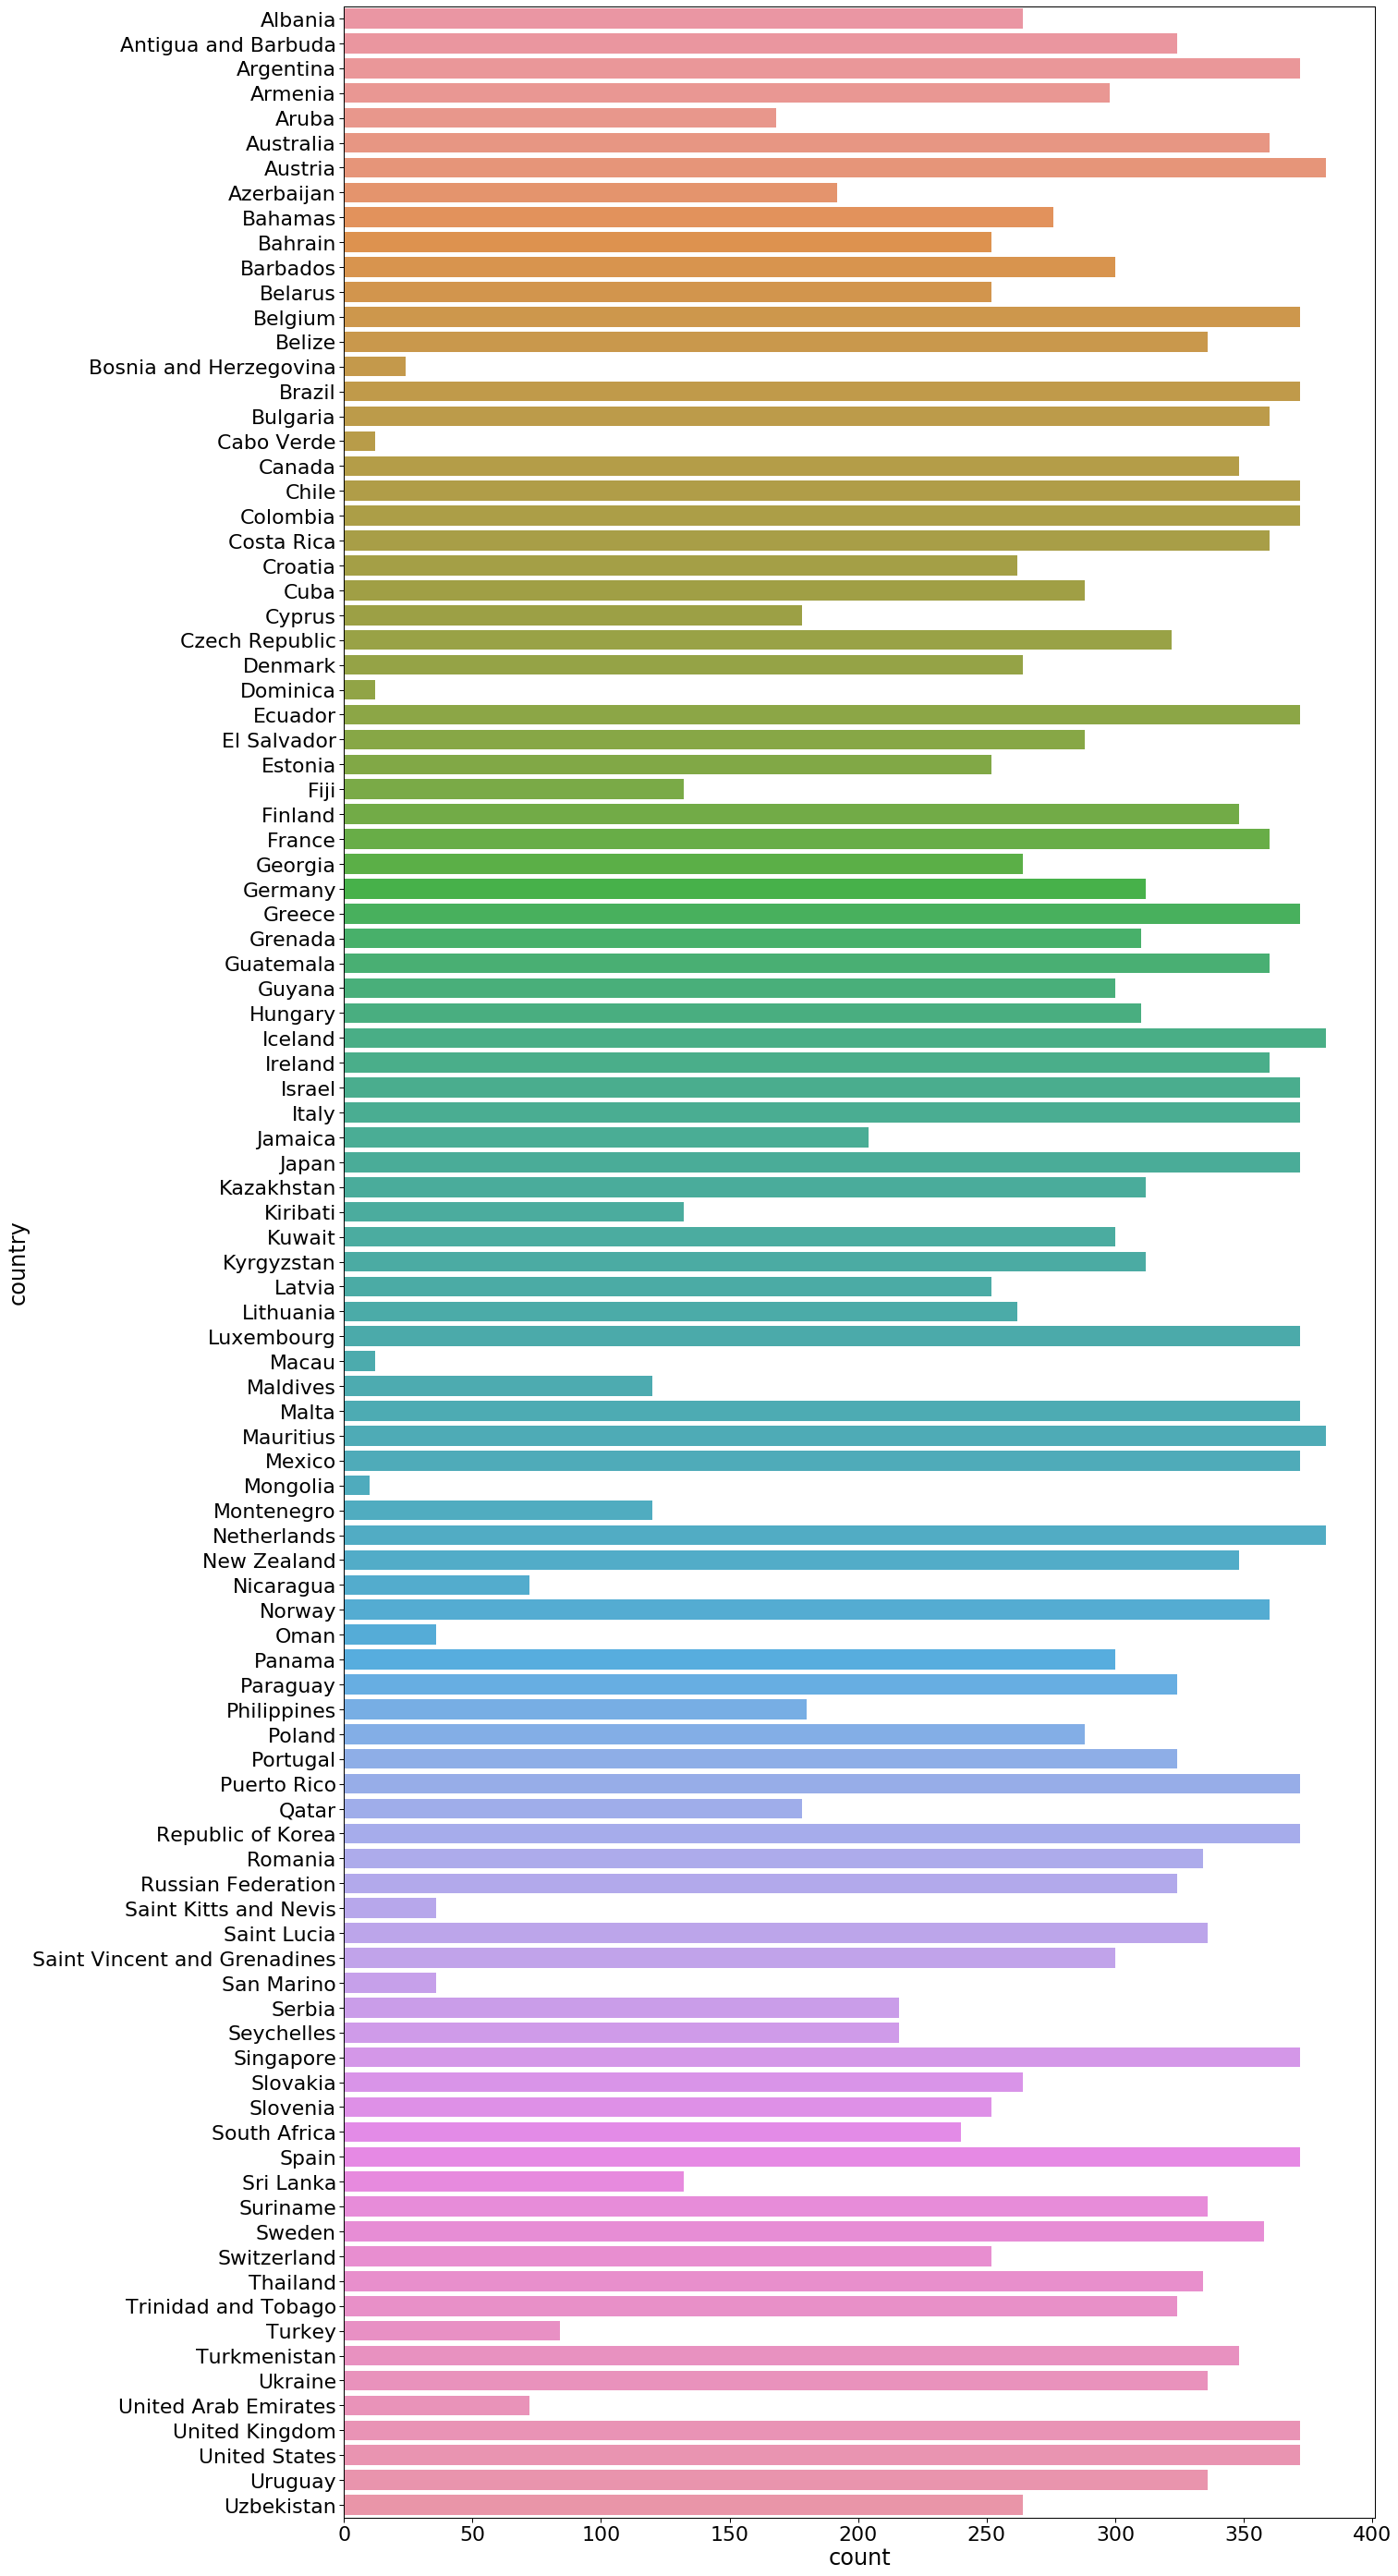

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,50))
y = data['country']
sns.set_context("paper", 2.5, {"lines.linewidth": 4})
sns.countplot(y=y,label='count')

#### Número de datos por año

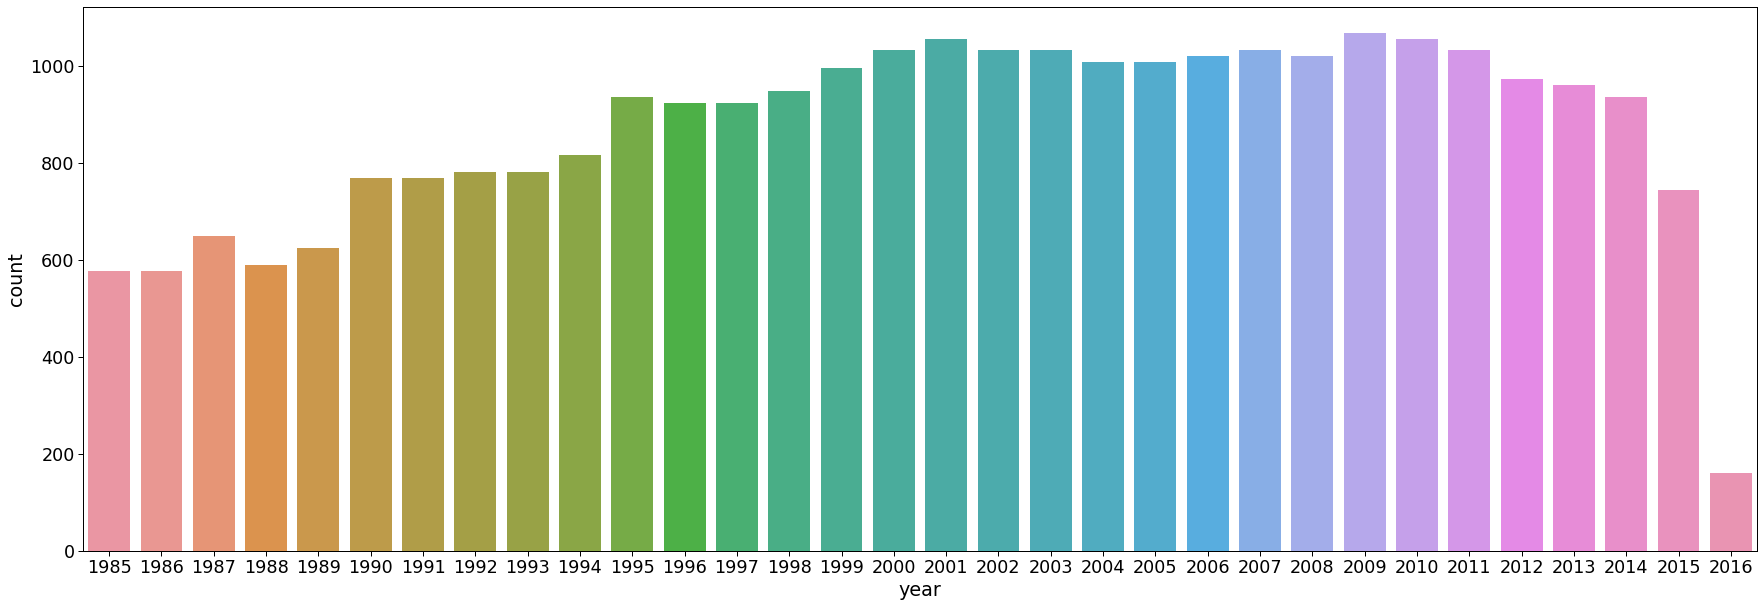

In [29]:
plt.figure(figsize=(30,10))
y = data['year']
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.countplot(y,label='count')

#### Número de datos por género

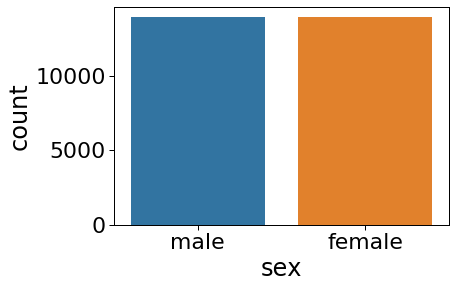

In [30]:
y = data['sex']
sns.set_context("paper", 2.5, {"lines.linewidth":4})
sns.countplot(y,label='count')

#### Número de datos por rango de edad

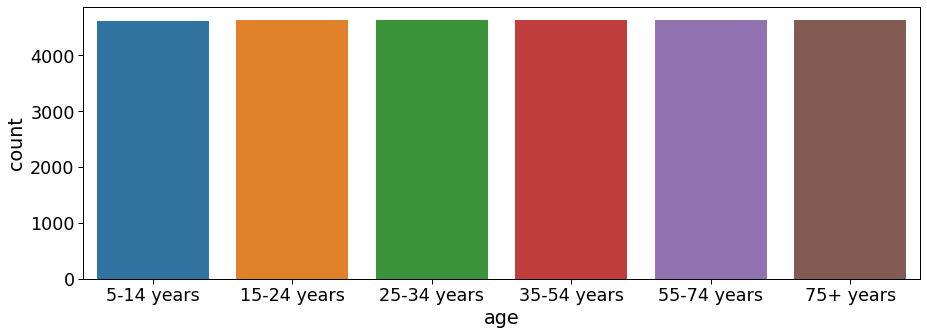

In [31]:
plt.figure(figsize=(15,5))
y = data['age']
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.countplot(y,label='count',order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

In [32]:
# NOTA: Quizás se considera que todas las combinaciones de género y edad están incluidas en país-año.

#### Número de datos por generación

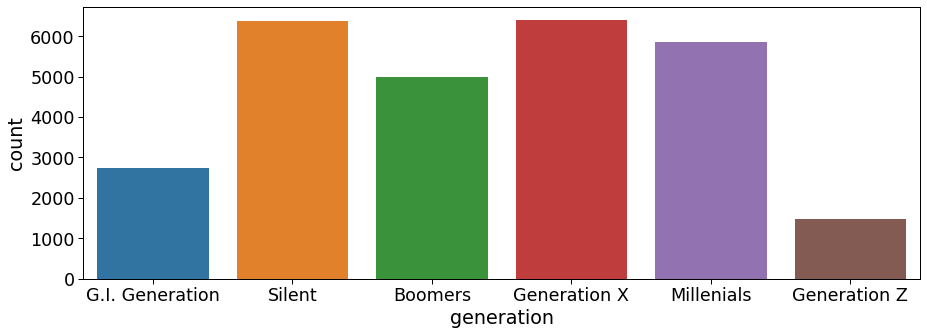

In [33]:
plt.figure(figsize=(15,5))
y = data['generation']
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.countplot(y,label='generation',order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])

#### Número de suicidios por género

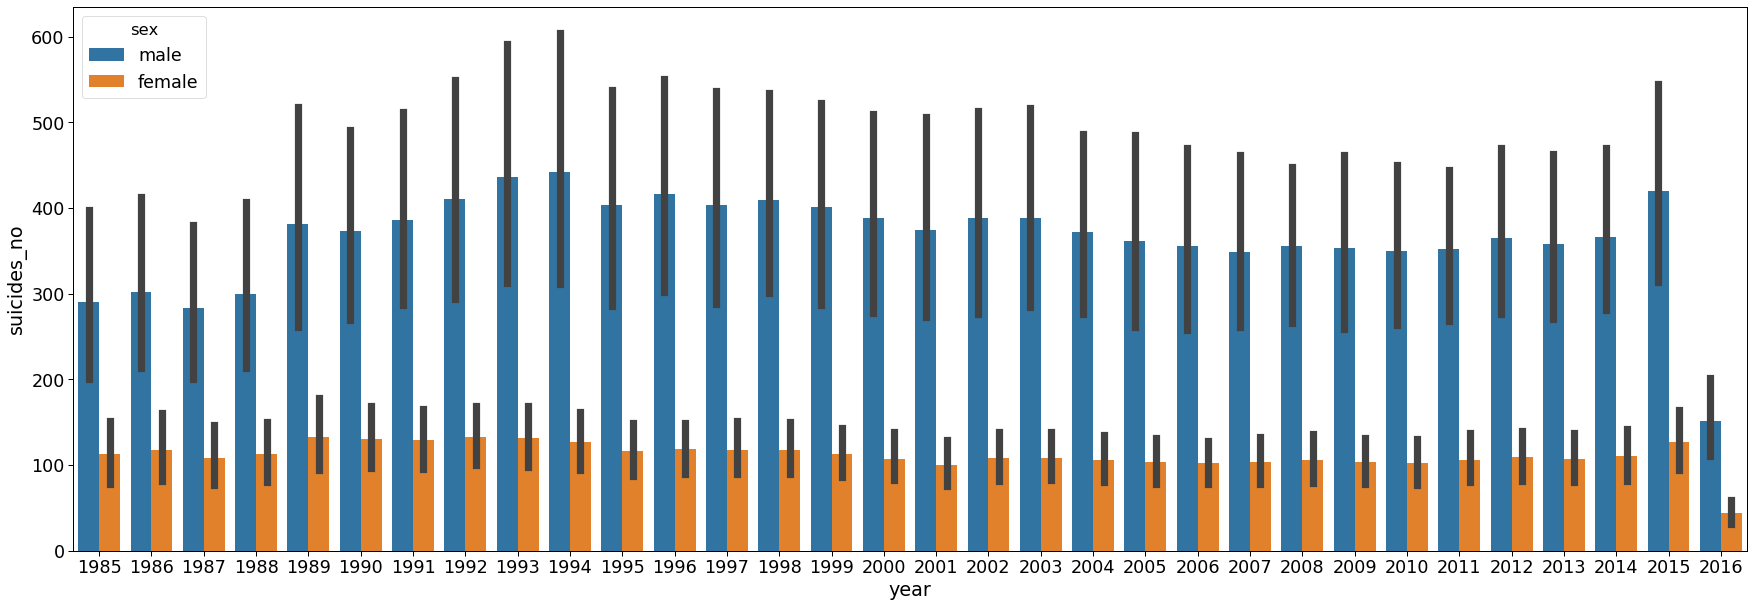

In [34]:
plt.figure(figsize=(30,10))
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.barplot(data=data,x='year',y='suicides_no',hue='sex')

In [35]:
# El número de suicidios masculinos es considerablemente mayor.

#### Número de suicidios por edad

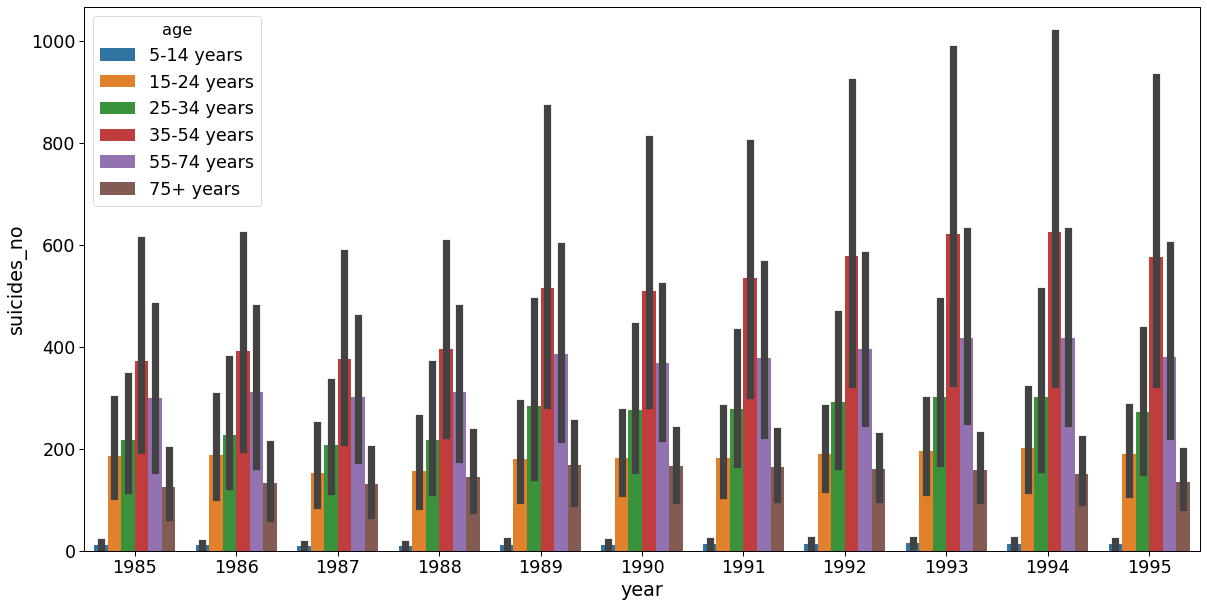

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[data['year']<1996],x='year',y='suicides_no',hue='age',
hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

In [37]:
# Rango 1985 - 1995

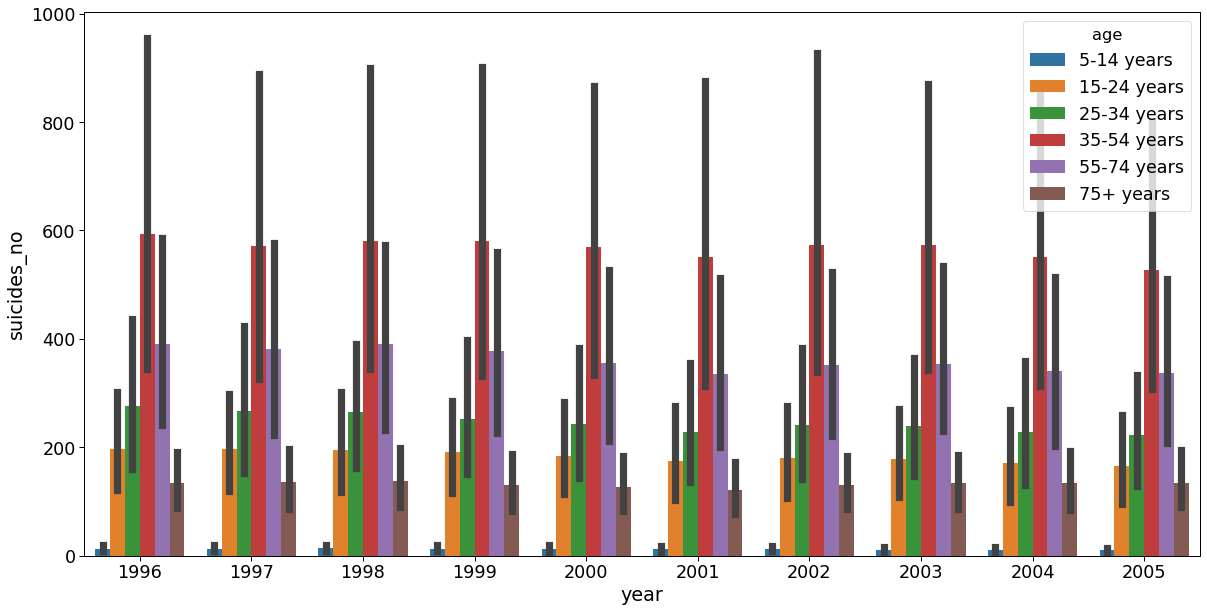

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[(data['year']>1995) & (data['year']<2006)],x='year',y='suicides_no',
hue='age',hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

In [39]:
# Rango 1996 - 2005

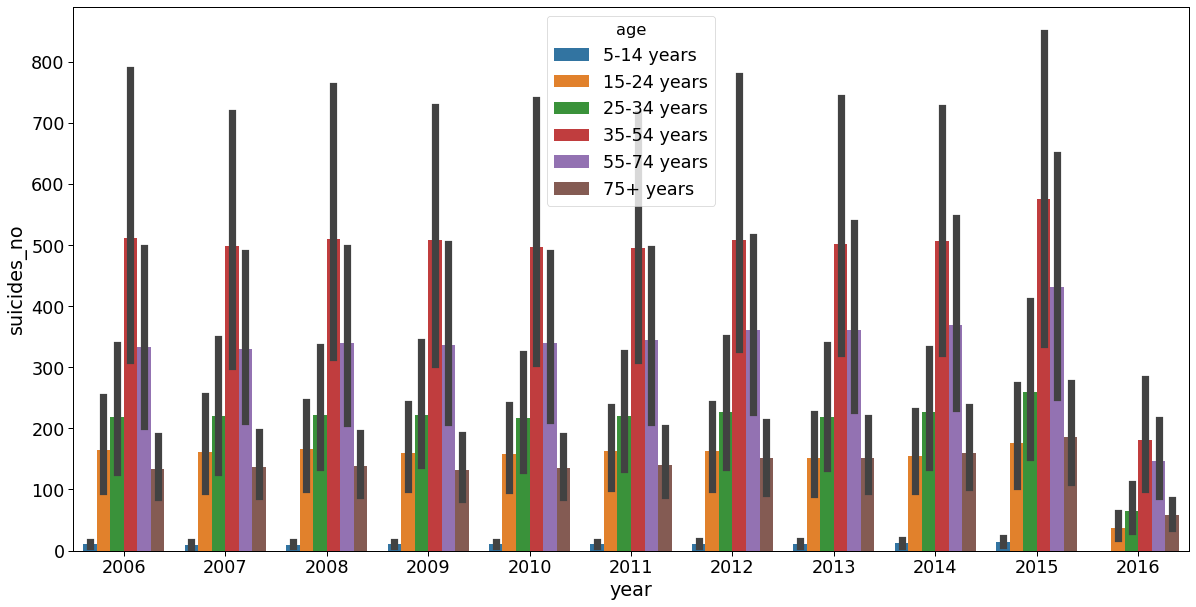

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[(data['year']>2005)],x='year',y='suicides_no',hue='age',
hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

In [41]:
# Rango 2006 - 2016

In [42]:
# El rango de edad de 35 - 54 años es el que más suicidios presenta

#### Número de suicidios por generación

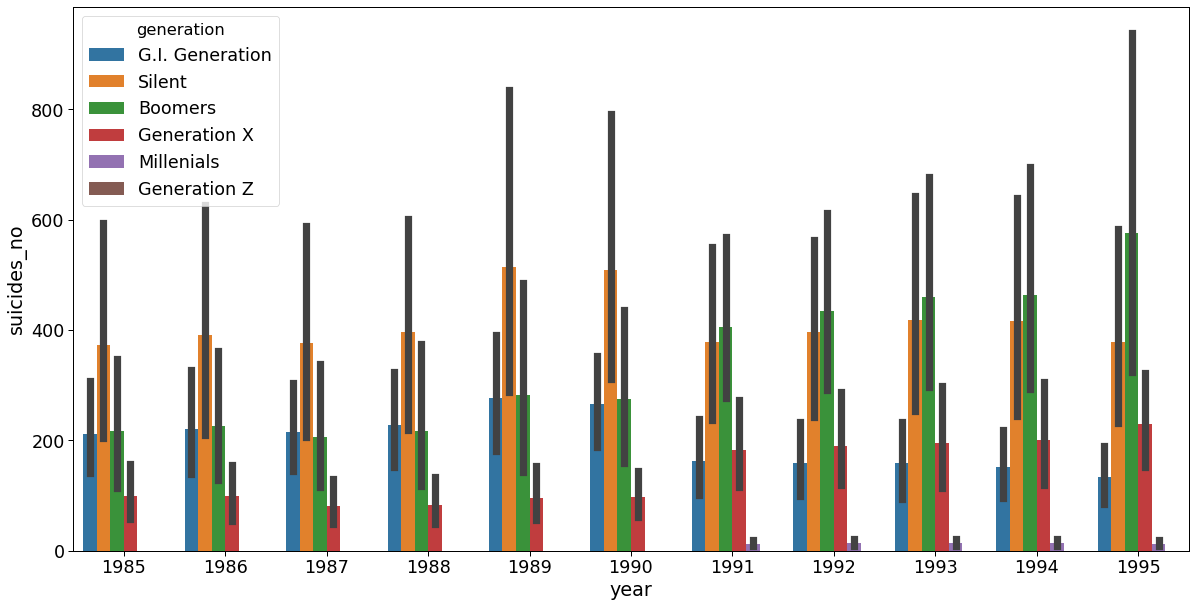

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[data['year']<1996],x='year',y='suicides_no',
hue='generation',hue_order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])

In [44]:
# Rango 1985 - 1995

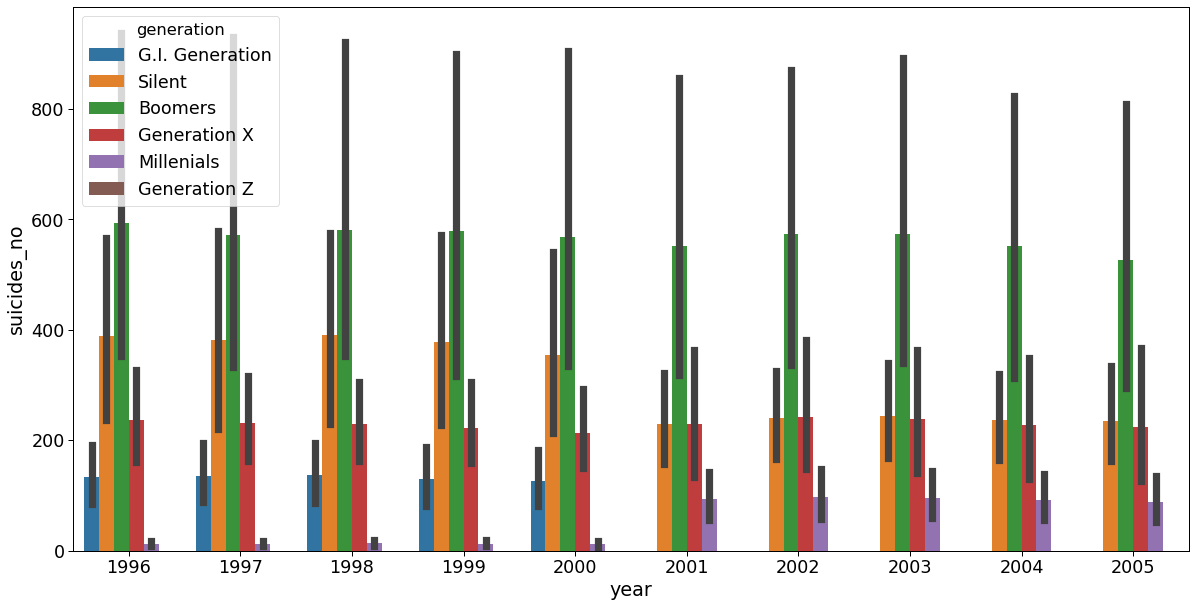

In [45]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[(data['year']>1995) & (data['year']<2006)],x='year',y='suicides_no',
hue='generation',hue_order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])

In [46]:
# Rango 1996 - 2005

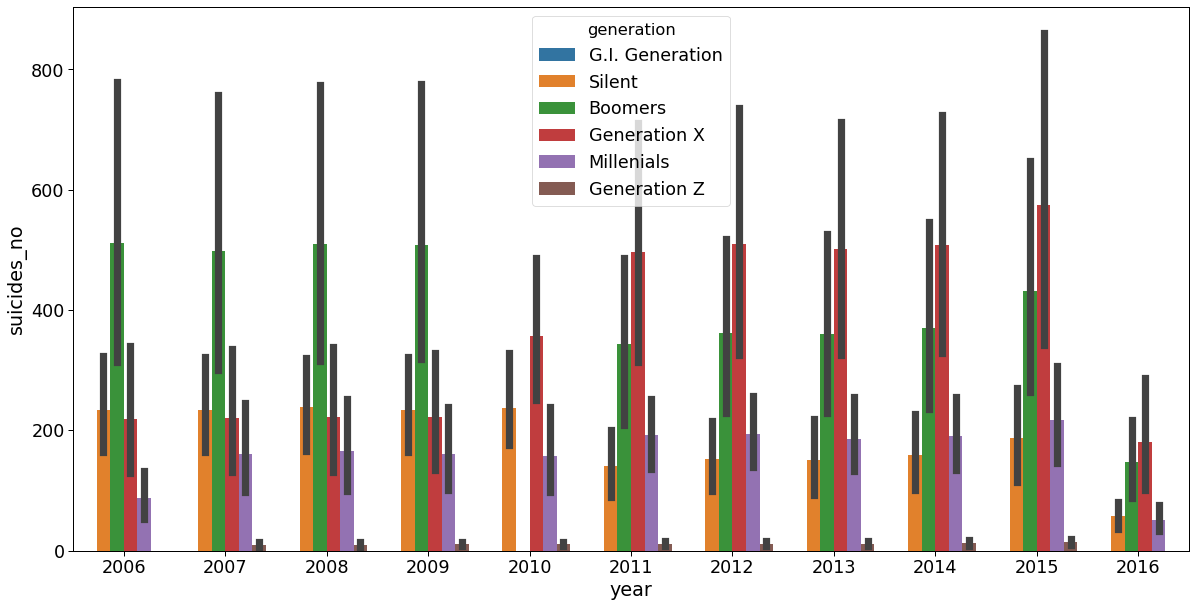

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[data['year']>2005],x='year',y='suicides_no',hue='generation',
hue_order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])

In [48]:
# Rango 2006 - 2016

In [49]:
# NOTA: No existe registros de la generación "Boomers" en el año 2010

#### Cambio generacional

In [50]:
data[(data['year'] == 2009) & (data['generation'] == 'Boomers')].head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year($),gdp_per_capita($),generation
242,Albania,2009,female,35-54 years,0,394286,0.00,Albania2009,NaN,12044212904,4387,Boomers
248,Albania,2009,male,35-54 years,0,374365,0.00,Albania2009,NaN,12044212904,4387,Boomers
530,Antigua and Barbuda,2009,female,35-54 years,0,14629,0.00,Antigua and Barbuda2009,NaN,1224253000,14335,Boomers
536,Antigua and Barbuda,2009,male,35-54 years,0,12978,0.00,Antigua and Barbuda2009,NaN,1224253000,14335,Boomers
880,Argentina,2009,male,35-54 years,542,4566645,11.87,Argentina2009,NaN,332976484578,8961,Boomers


In [51]:
data[(data['year'] == 2011) & (data['generation'] == 'Boomers')].head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year($),gdp_per_capita($),generation
903,Argentina,2011,male,55-74 years,416,2788575,14.92,Argentina2011,0.818,530163281575,13946,Boomers
908,Argentina,2011,female,55-74 years,93,3268753,2.85,Argentina2011,0.818,530163281575,13946,Boomers
1190,Armenia,2011,male,55-74 years,11,194982,5.64,Armenia2011,0.723,10142111334,3798,Boomers
1195,Armenia,2011,female,55-74 years,3,256541,1.17,Armenia2011,0.723,10142111334,3798,Boomers
1414,Aruba,2011,male,55-74 years,3,8940,33.56,Aruba2011,NaN,2584463687,27066,Boomers


In [52]:
# Fijarse en la columna "age"
# Cambio en el rango de edad. Explicación del porque en el año 2010 desaparece su registro

In [53]:
# La edad puede sufrir cambios debido al problema del umbral en el punto de inflexión de la generación.

#### Listado de cambios de edad en las generaciones

In [54]:
year_list = list(range(1985,2017))
for i in year_list:
    print('year:{},generation:G.I. Generation {}'.format(i,np.unique(data[(data['year'] == i) 
    & (data['generation'] == 'G.I. Generation')]['age'].values)))
    print('year:{},generation:Silent {}'.format(i,np.unique(data[(data['year'] == i) 
    & (data['generation'] == 'Silent')]['age'].values)))
    print('year:{},generation:Boomers {}'.format(i,np.unique(data[(data['year'] == i) 
    & (data['generation'] == 'Boomers')]['age'].values)))
    print('year:{},generation:Generation X {}'.format(i,np.unique(data[(data['year'] == i) 
    & (data['generation'] == 'Generation X')]['age'].values)))
    print('year:{},generation:Millenials {}'.format(i,np.unique(data[(data['year'] == i) 
    & (data['generation'] == 'Millenials')]['age'].values)))
    print('year:{},generation:Generation Z {}'.format(i,np.unique(data[(data['year'] == i) 
    & (data['generation'] == 'Generation Z')]['age'].values)))
    print('-'*100)

year:1985,generation:G.I. Generation ['55-74 years' '75+ years']
year:1985,generation:Silent ['35-54 years']
year:1985,generation:Boomers ['25-34 years']
year:1985,generation:Generation X ['15-24 years' '5-14 years']
year:1985,generation:Millenials []
year:1985,generation:Generation Z []
----------------------------------------------------------------------------------------------------
year:1986,generation:G.I. Generation ['55-74 years' '75+ years']
year:1986,generation:Silent ['35-54 years']
year:1986,generation:Boomers ['25-34 years']
year:1986,generation:Generation X ['15-24 years' '5-14 years']
year:1986,generation:Millenials []
year:1986,generation:Generation Z []
----------------------------------------------------------------------------------------------------
year:1987,generation:G.I. Generation ['55-74 years' '75+ years']
year:1987,generation:Silent ['35-54 years']
year:1987,generation:Boomers ['25-34 years']
year:1987,generation:Generation X ['15-24 years' '5-14 years']
yea

In [55]:
# 1991:
#   55-74 años : G.I Generations → Silent
#   5-14 años : Generation X → Millenials

# 1995:
#   25-34 años : Boomers → Generation X
    
# 2001:
#   75+ años : G.I. Generation → Silent
#   15-24 años : Generation X → Millenials

# 2007:
#   5-14 años : Millenials→Generation Z
    
# 2010:
#   35-54 años : Boomers → Generation X
    
# 2011:
#   55-74 años : Silent → Boomers
#   25-34 años : Generation X → Millenials

#### Población por género

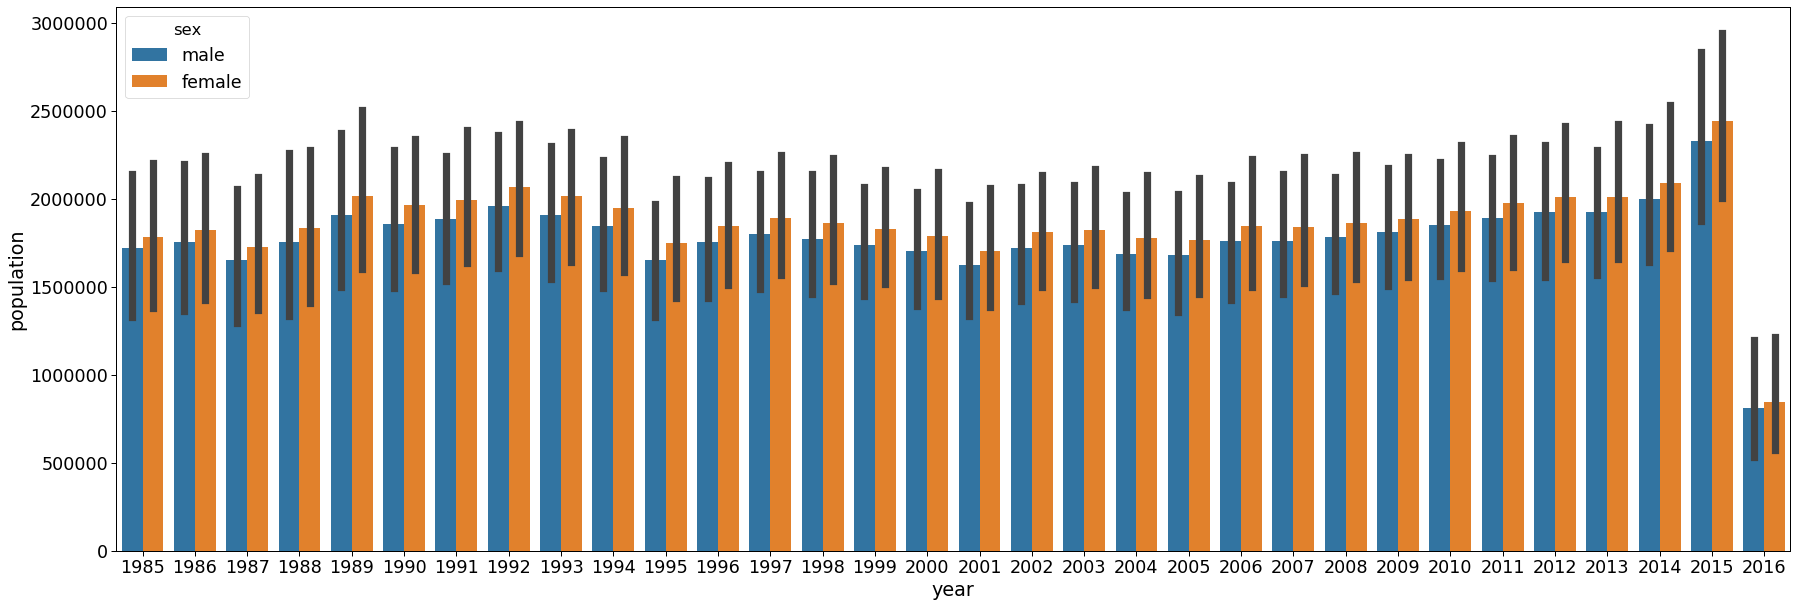

In [56]:
plt.figure(figsize=(30,10))
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.barplot(data=data,x='year',y='population',hue='sex')

#### Población por edad

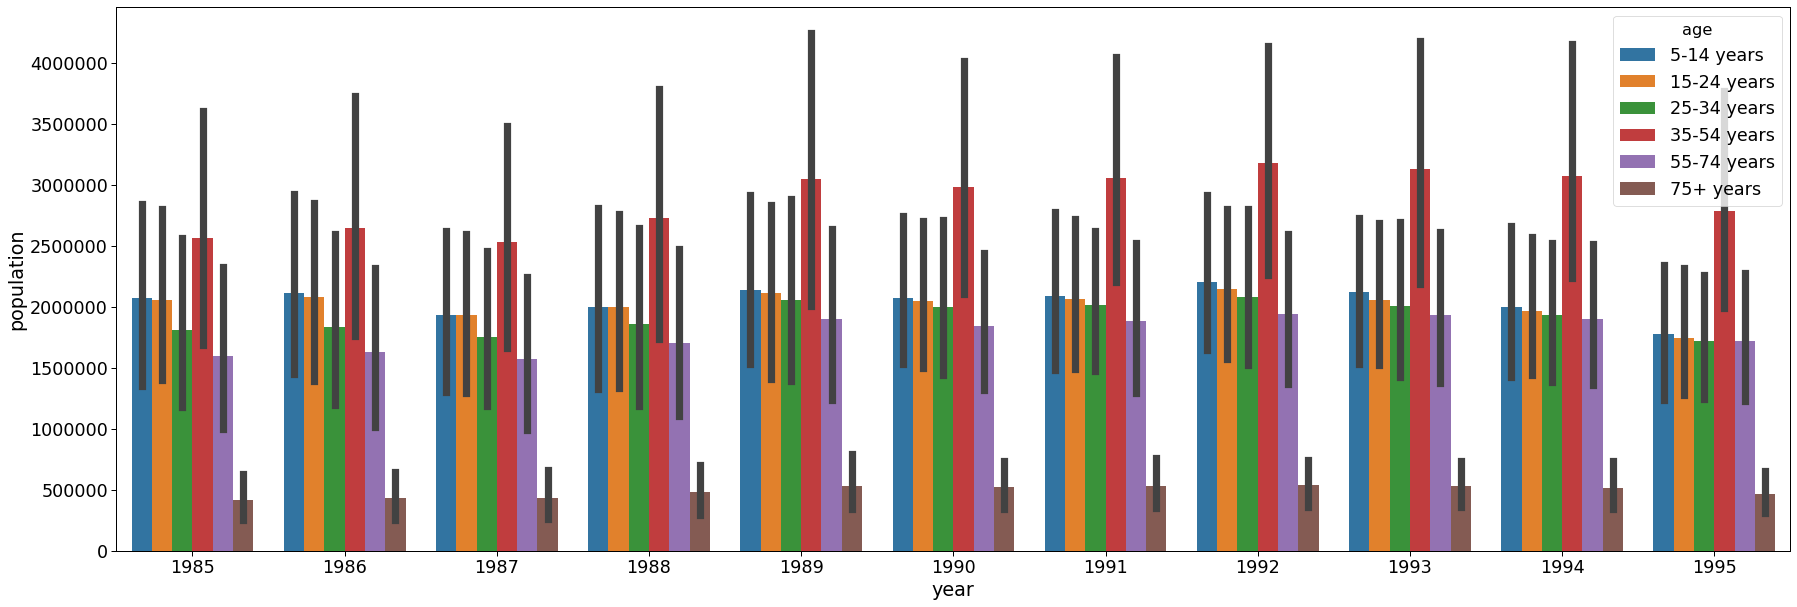

In [57]:
plt.figure(figsize=(30,10))
sns.barplot(data=data[data['year']<1996],x='year',y='population',
hue='age',hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

In [58]:
# Rango 1985 - 1995

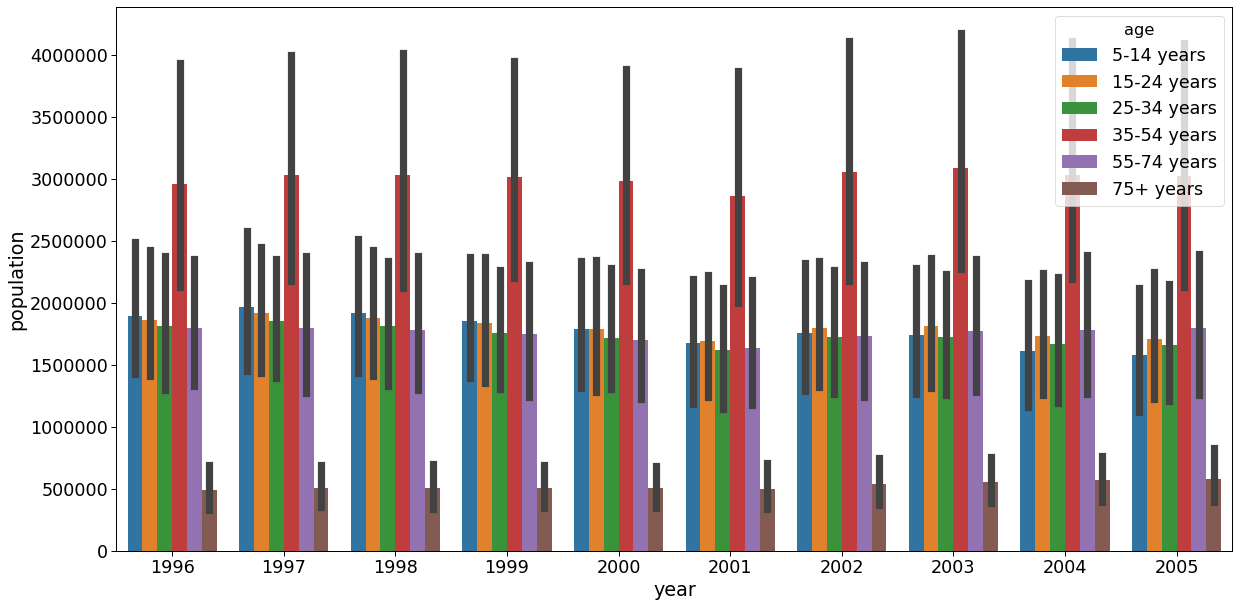

In [59]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[(data['year']>1995) & (data['year']<2006)],x='year',y='population',hue='age',
hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

In [60]:
# Rango 1996 - 2005

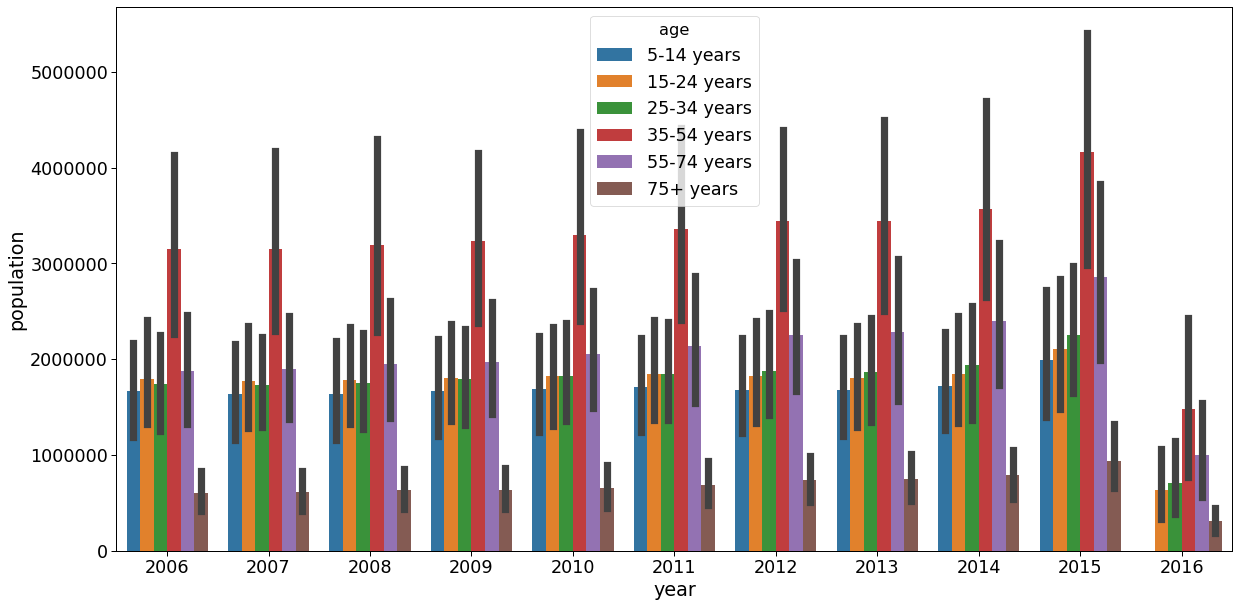

In [61]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[(data['year']>2005)],x='year',y='population',hue='age',
hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

In [62]:
# Rango 2006 - 2016

#### Población por generación

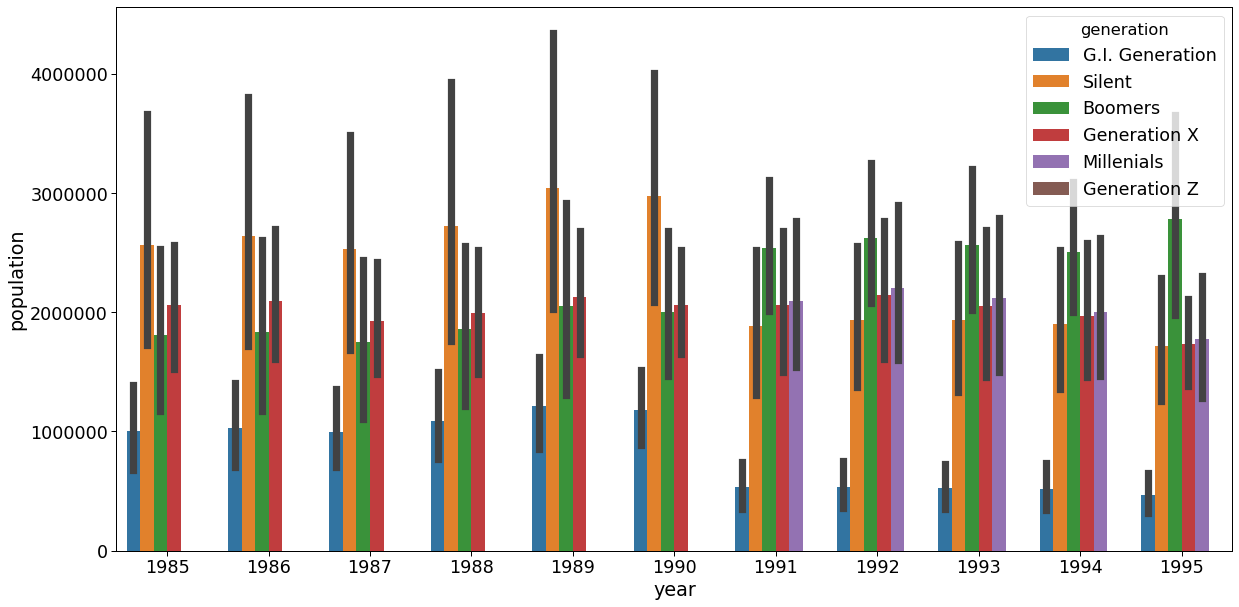

In [63]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[data['year']<1996],x='year',y='population',hue='generation',
hue_order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])

In [64]:
# Rango 1985 - 1995

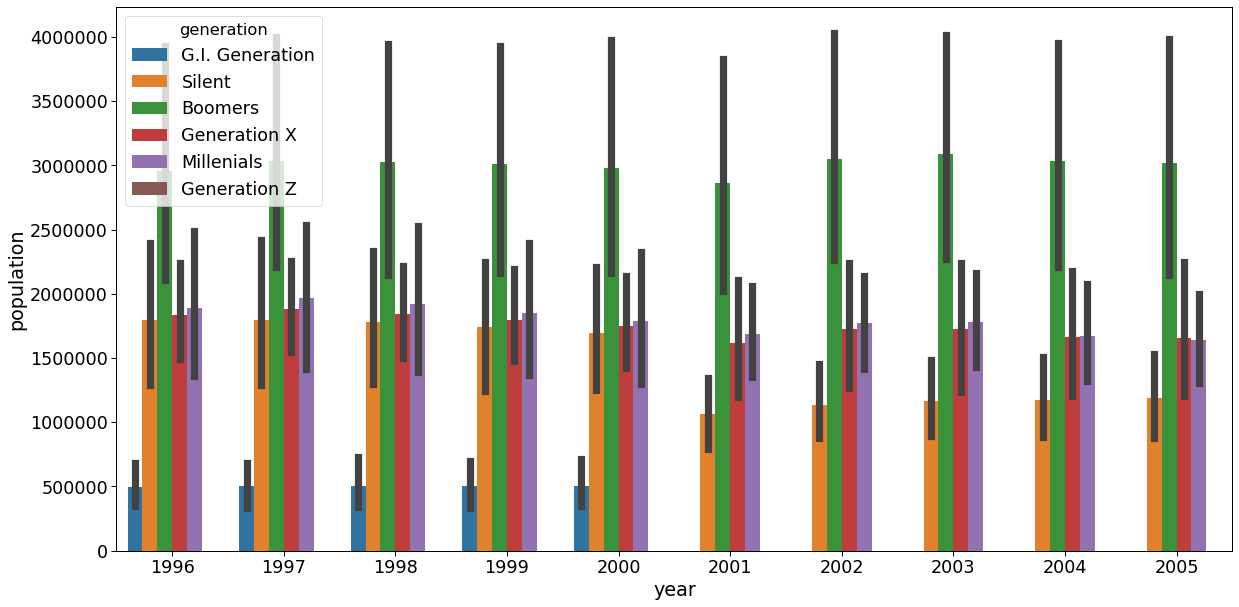

In [65]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[(data['year']>1995) & (data['year']<2006)],x='year',y='population',
hue='generation',hue_order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])

In [66]:
# Rango 1996 - 2005

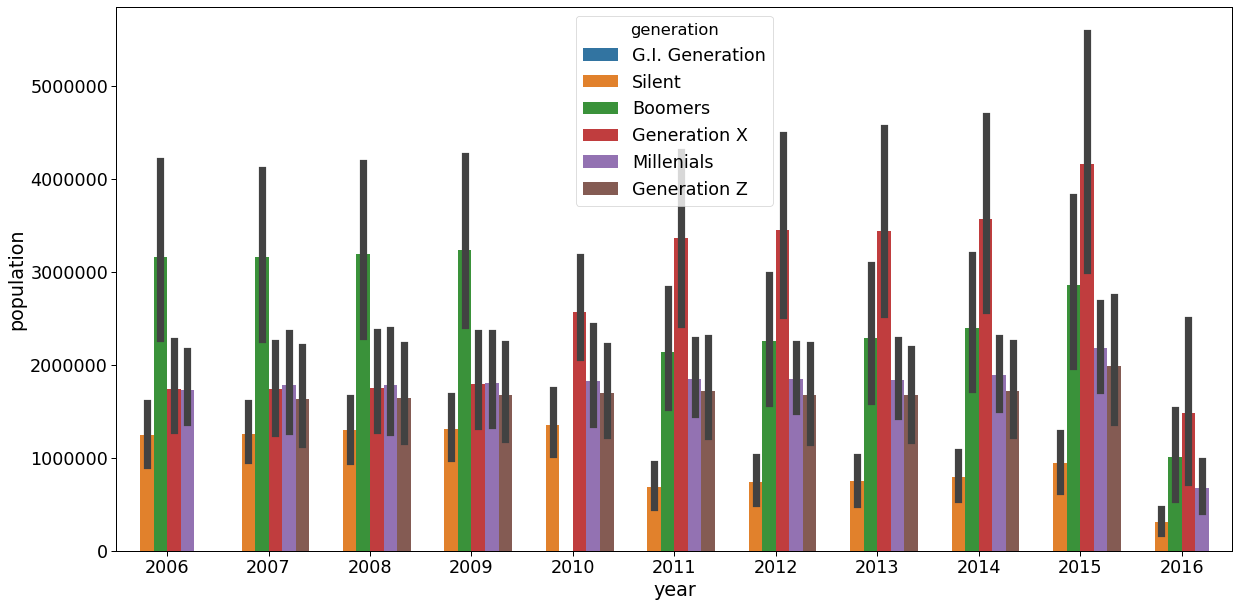

In [67]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[data['year']>2005],x='year',y='population',hue='generation',
hue_order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])

In [68]:
# Rango 2006 - 2016

#### Suicidio por cada 100.000 personas por género

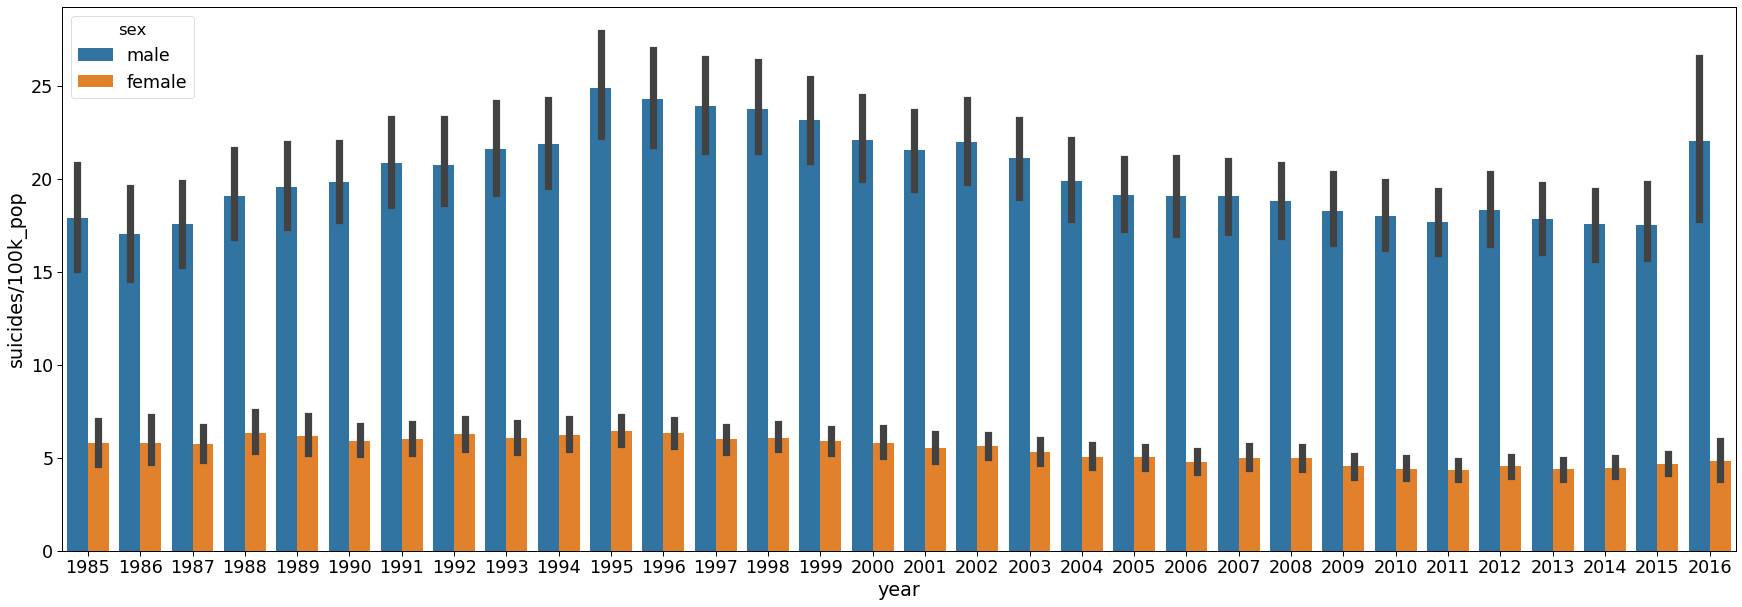

In [69]:
plt.figure(figsize=(30,10))
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.barplot(data=data,x='year',y='suicides/100k_pop',hue='sex')

In [70]:
# De igual manera, hay mayoría de hombres suicidas por cada 100,000 personas.

#### Suicidio por cada 100,000 personas por edad

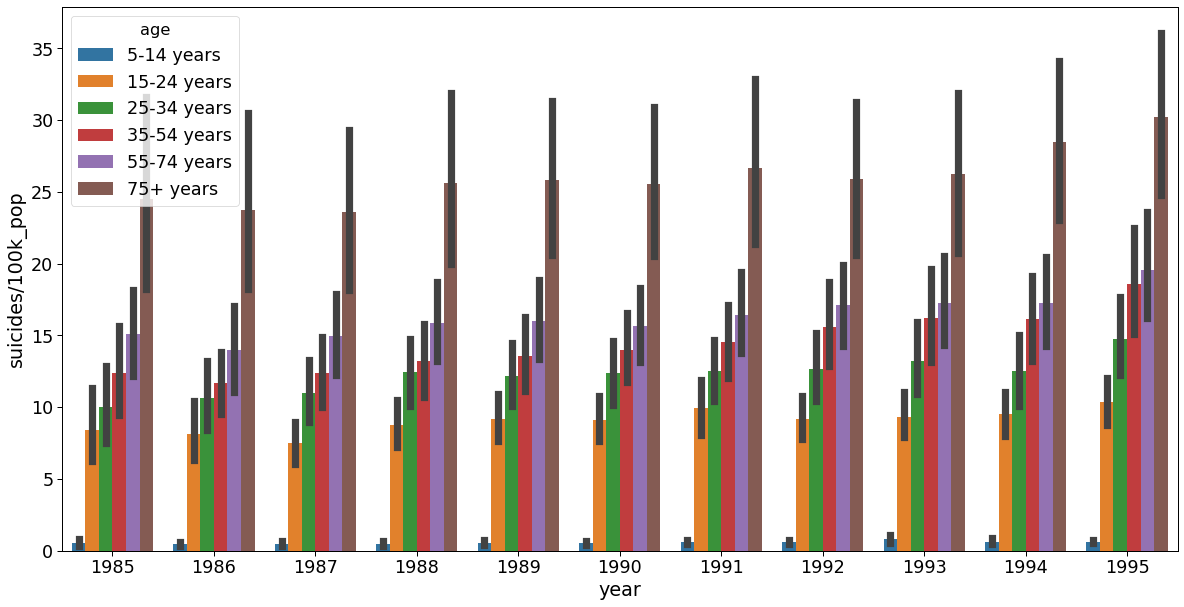

In [71]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[data['year']<1996],x='year',y='suicides/100k_pop',hue='age',
hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

In [72]:
# Rango 1985 - 1995

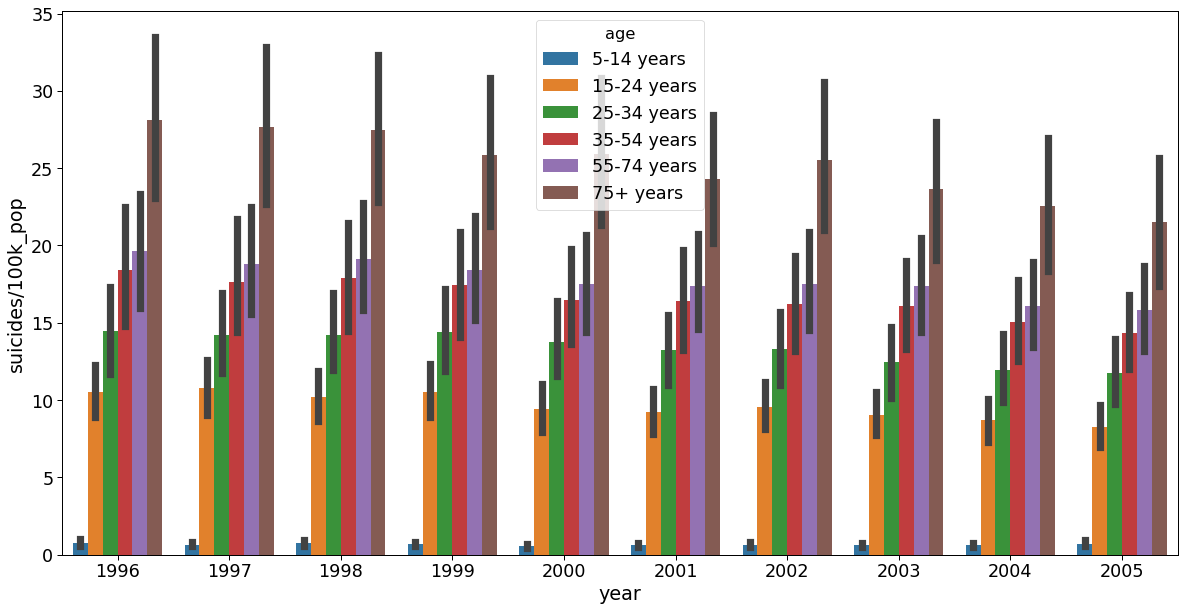

In [73]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[(data['year']>1995) & (data['year']<2006)],x='year',y='suicides/100k_pop',hue='age',
hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

In [74]:
# Rango 1996 - 2005

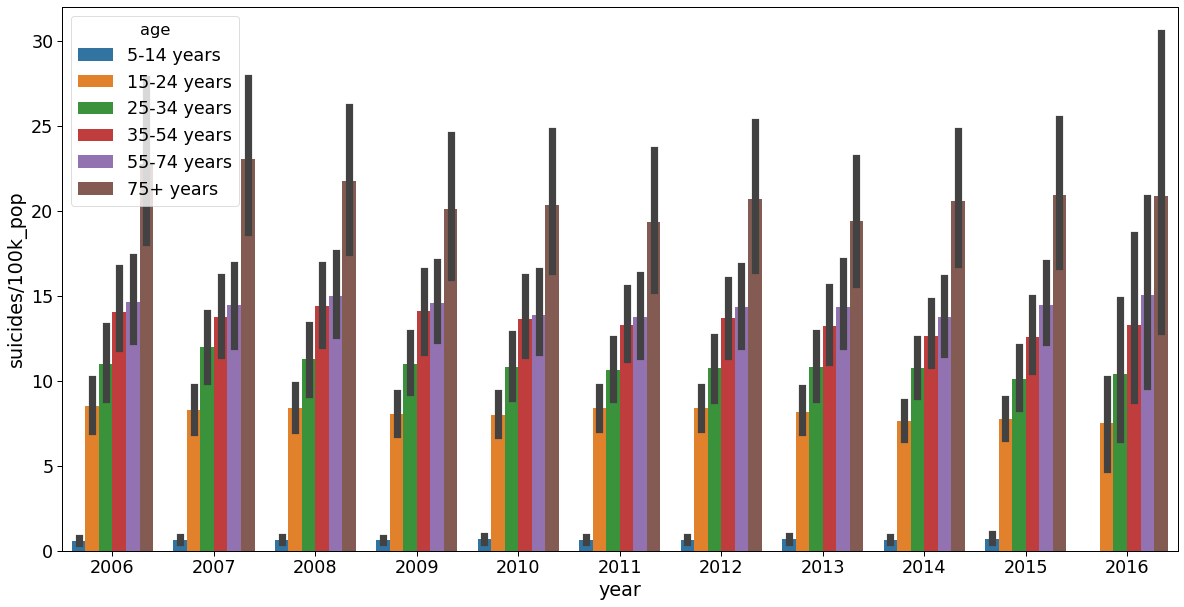

In [75]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[(data['year'] >2005)],x='year',y='suicides/100k_pop',hue='age',
hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

In [76]:
# Rango 2006 - 2016

In [77]:
# El número de personas suicidas mayores de 75 años es el más grande.

#### Suicidio por cada 100,000 personas por generación

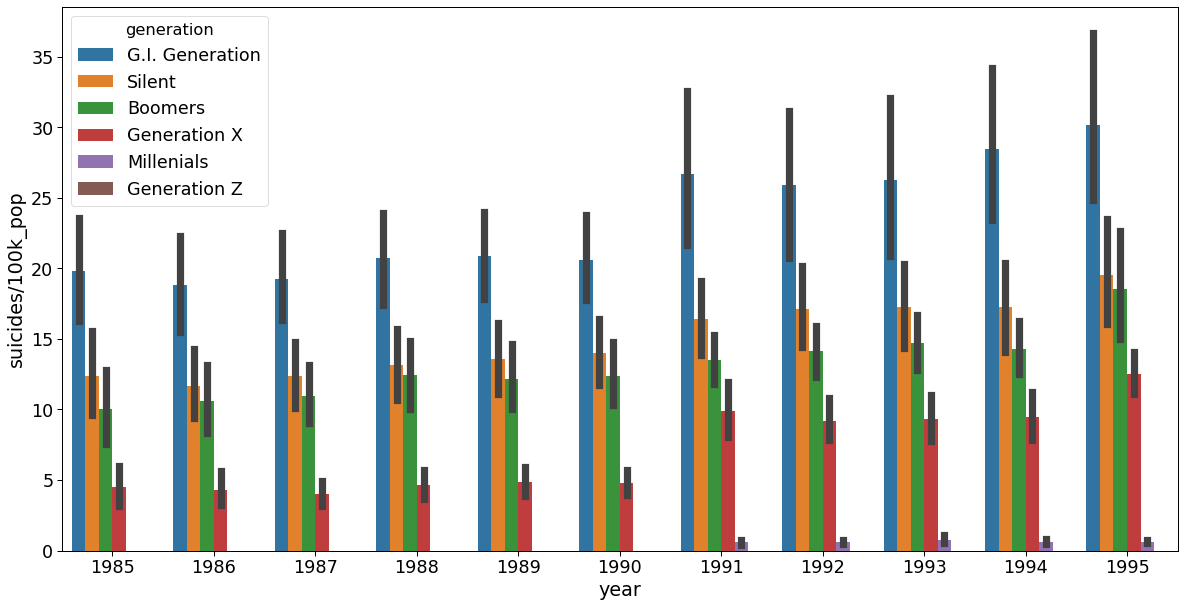

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[data['year']<1996],x='year',y='suicides/100k_pop',hue='generation',
hue_order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])

In [79]:
# Rango 1985 - 1995

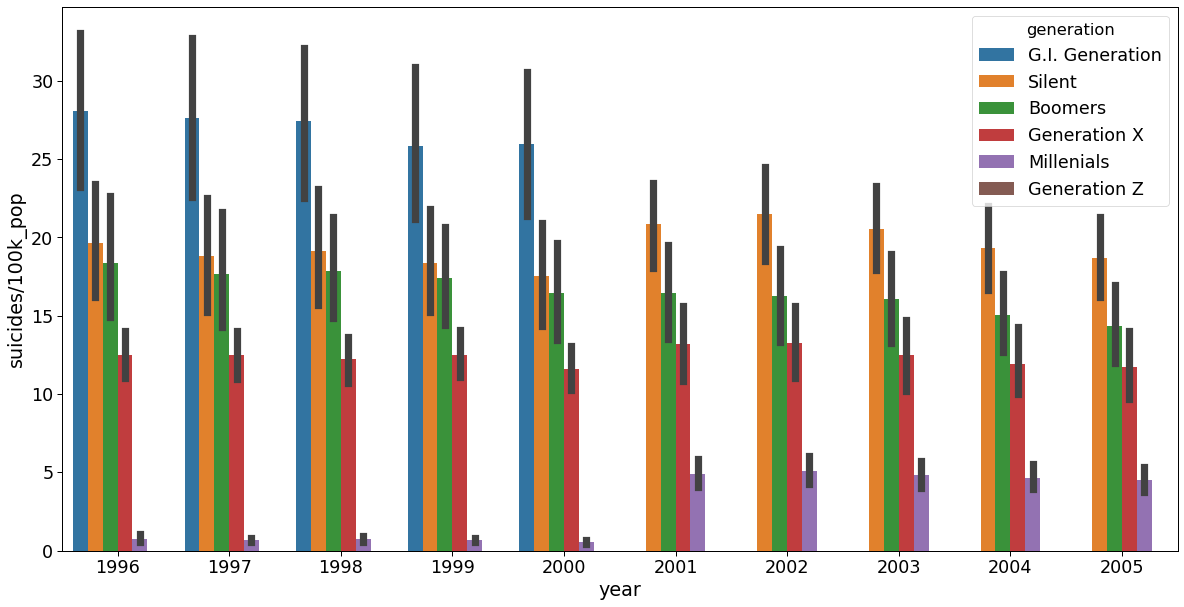

In [80]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[(data['year']>1995) & (data['year']<2006)],x='year',y='suicides/100k_pop',hue='generation',
hue_order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])

In [81]:
# Rango 1996 - 2005

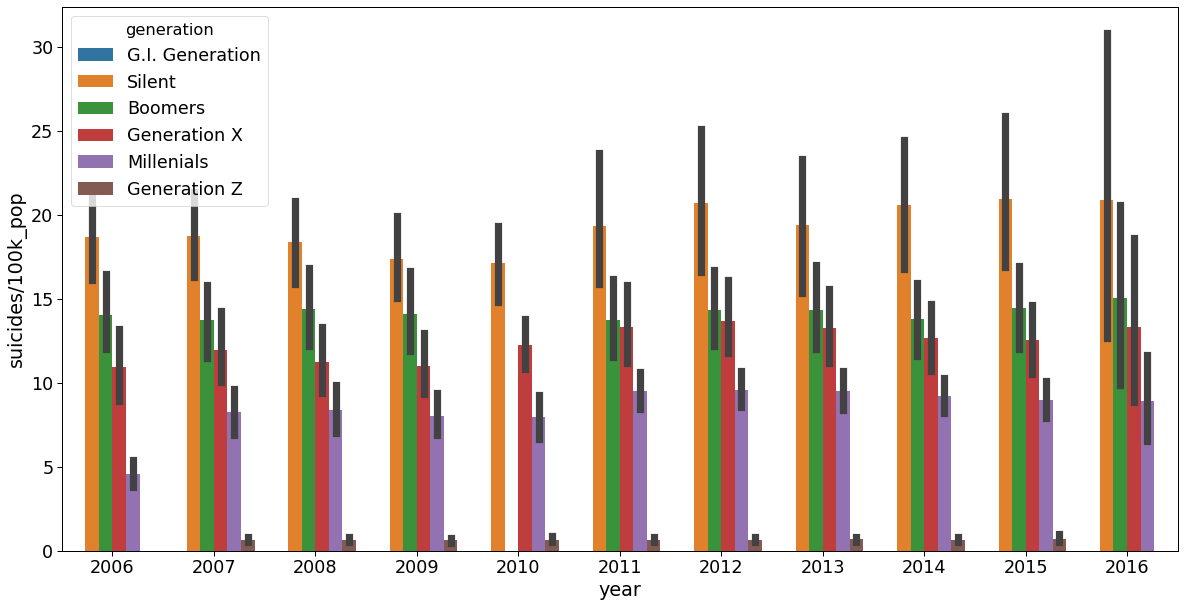

In [82]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[data['year']>2005],x='year',y='suicides/100k_pop',hue='generation',
hue_order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])

In [83]:
# Rango 2006 - 2016

In [84]:
# Las ultimas generaciones son las más suicidas. G.I. Generation & Silent.

#### IDH por país

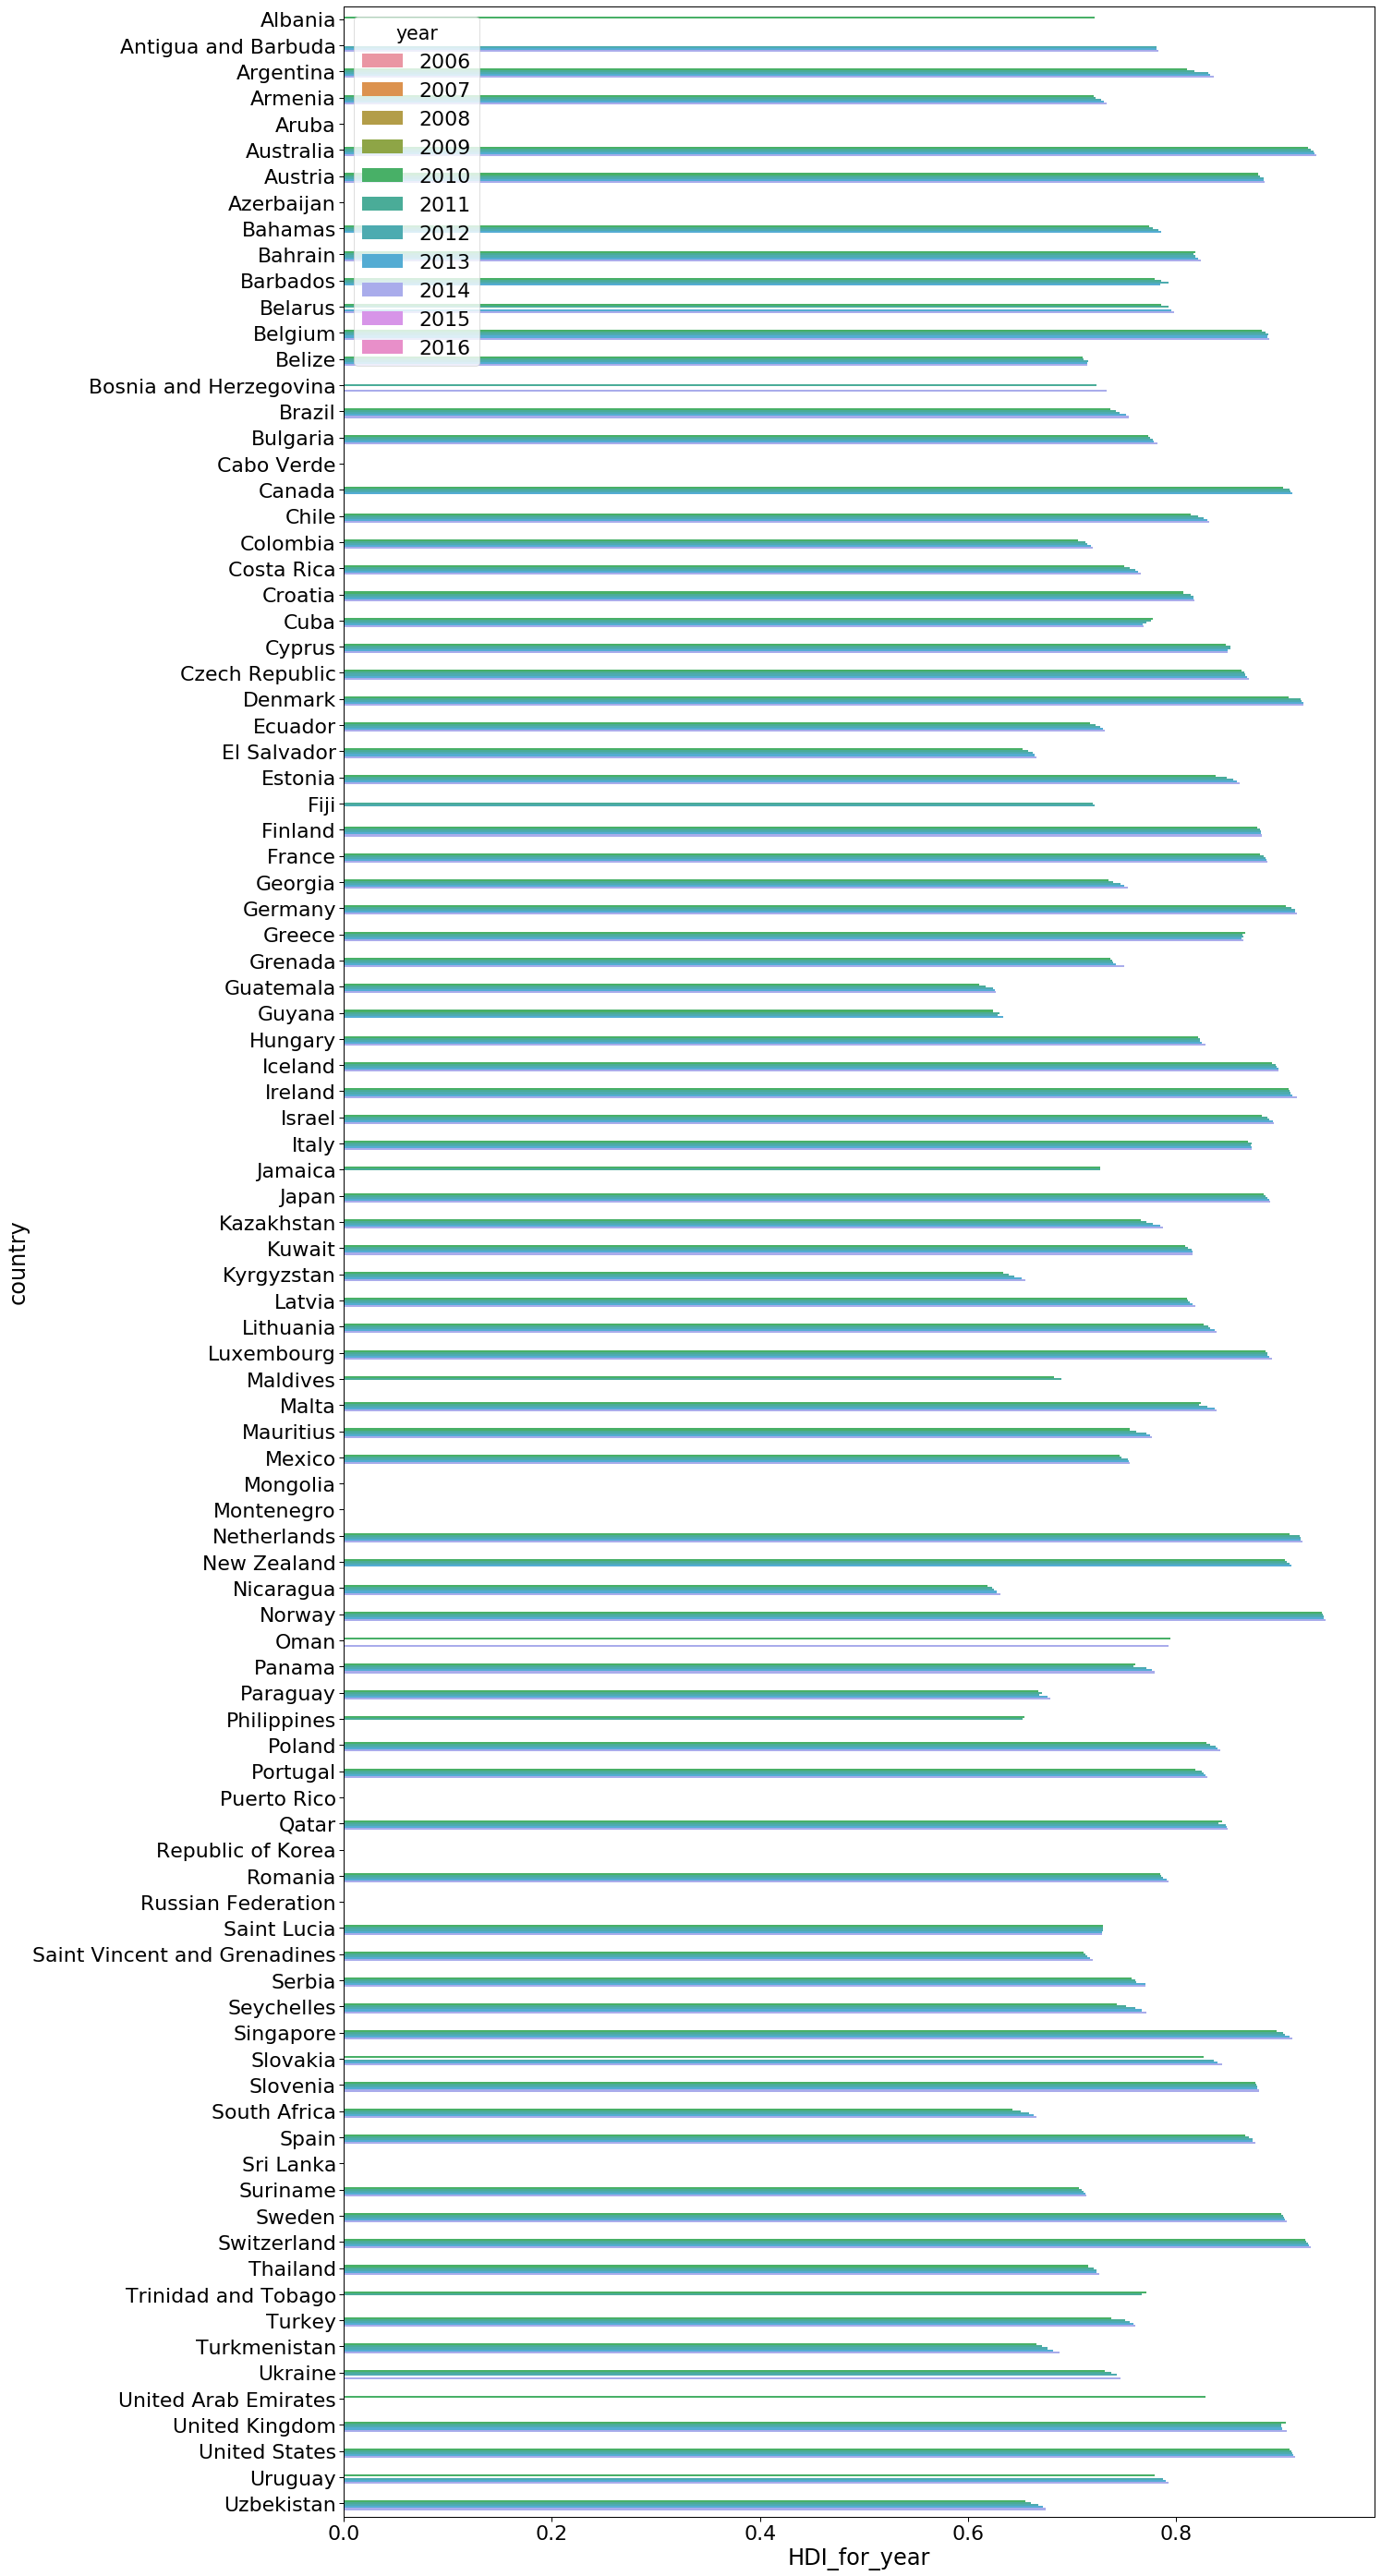

In [85]:
plt.figure(figsize=(20,50))
sns.set_context("paper", 2.5, {"lines.linewidth": 4})
sns.barplot(data=data[data['year']>2005],x='HDI_for_year',y='country',hue='year')

#### GDP por año por país

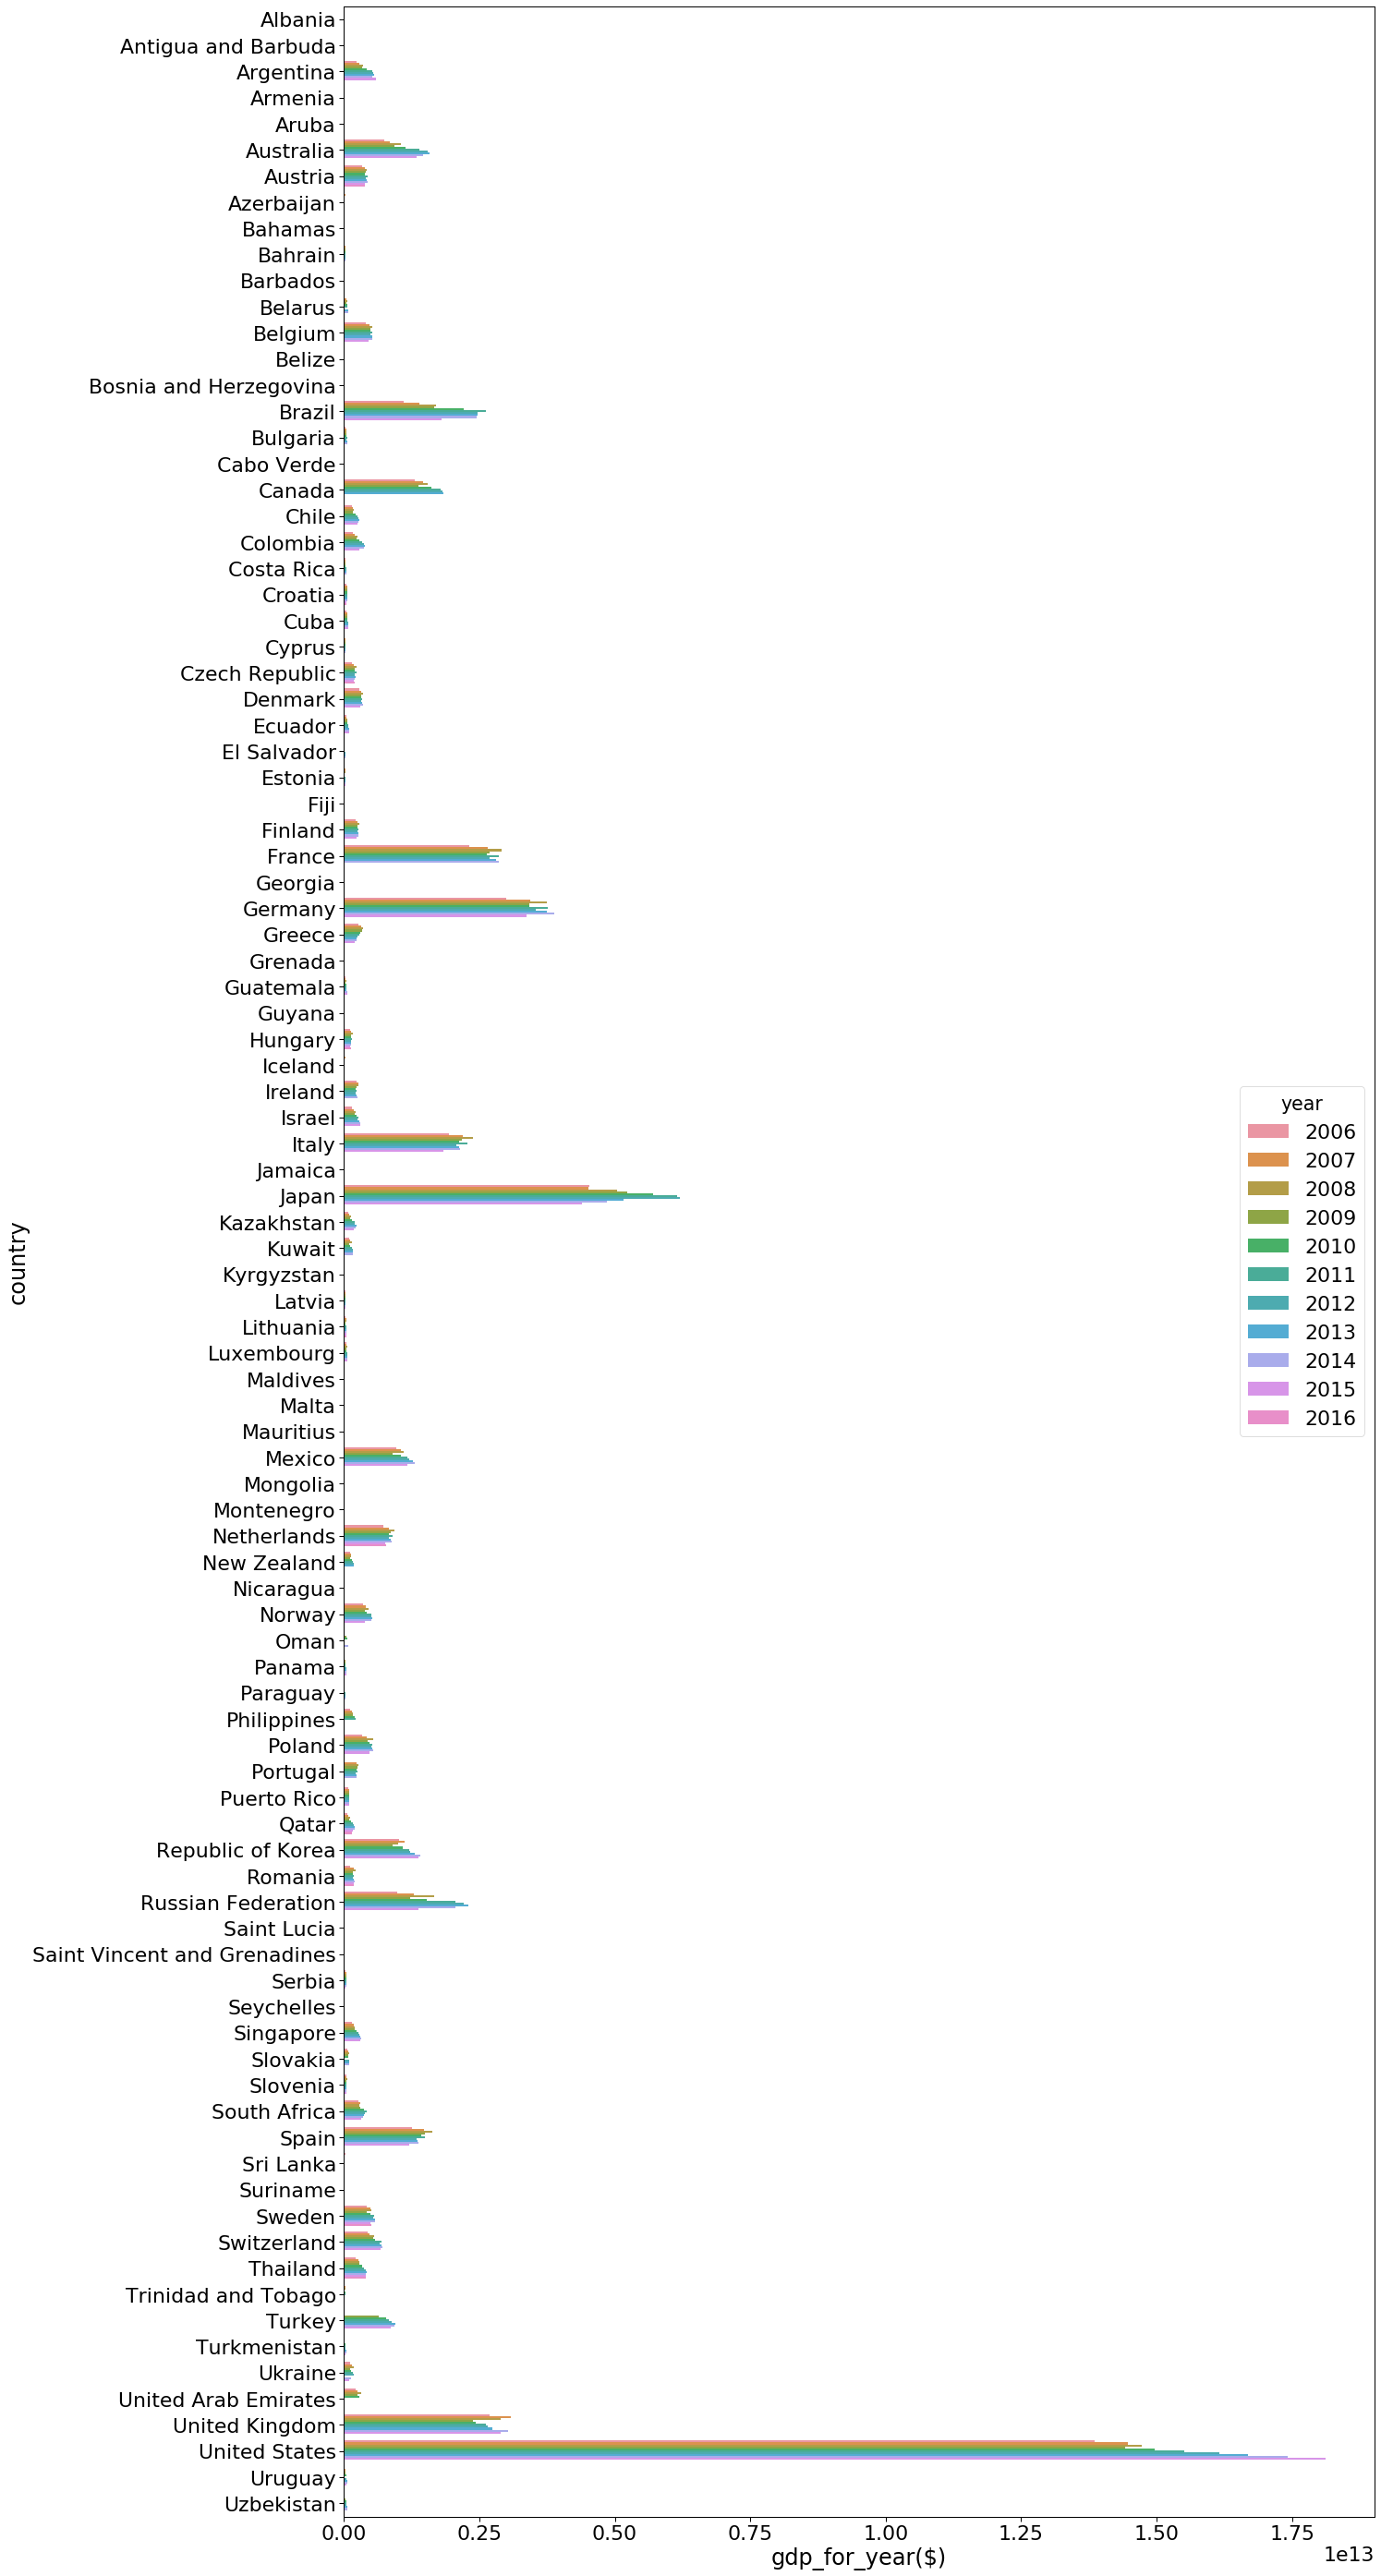

In [86]:
plt.figure(figsize=(20,50))
sns.set_context("paper", 2.5, {"lines.linewidth": 4})
sns.barplot(data=data[data['year']>2005],x='gdp_for_year($)',y='country',hue='year')

#### GDP per cápita por país

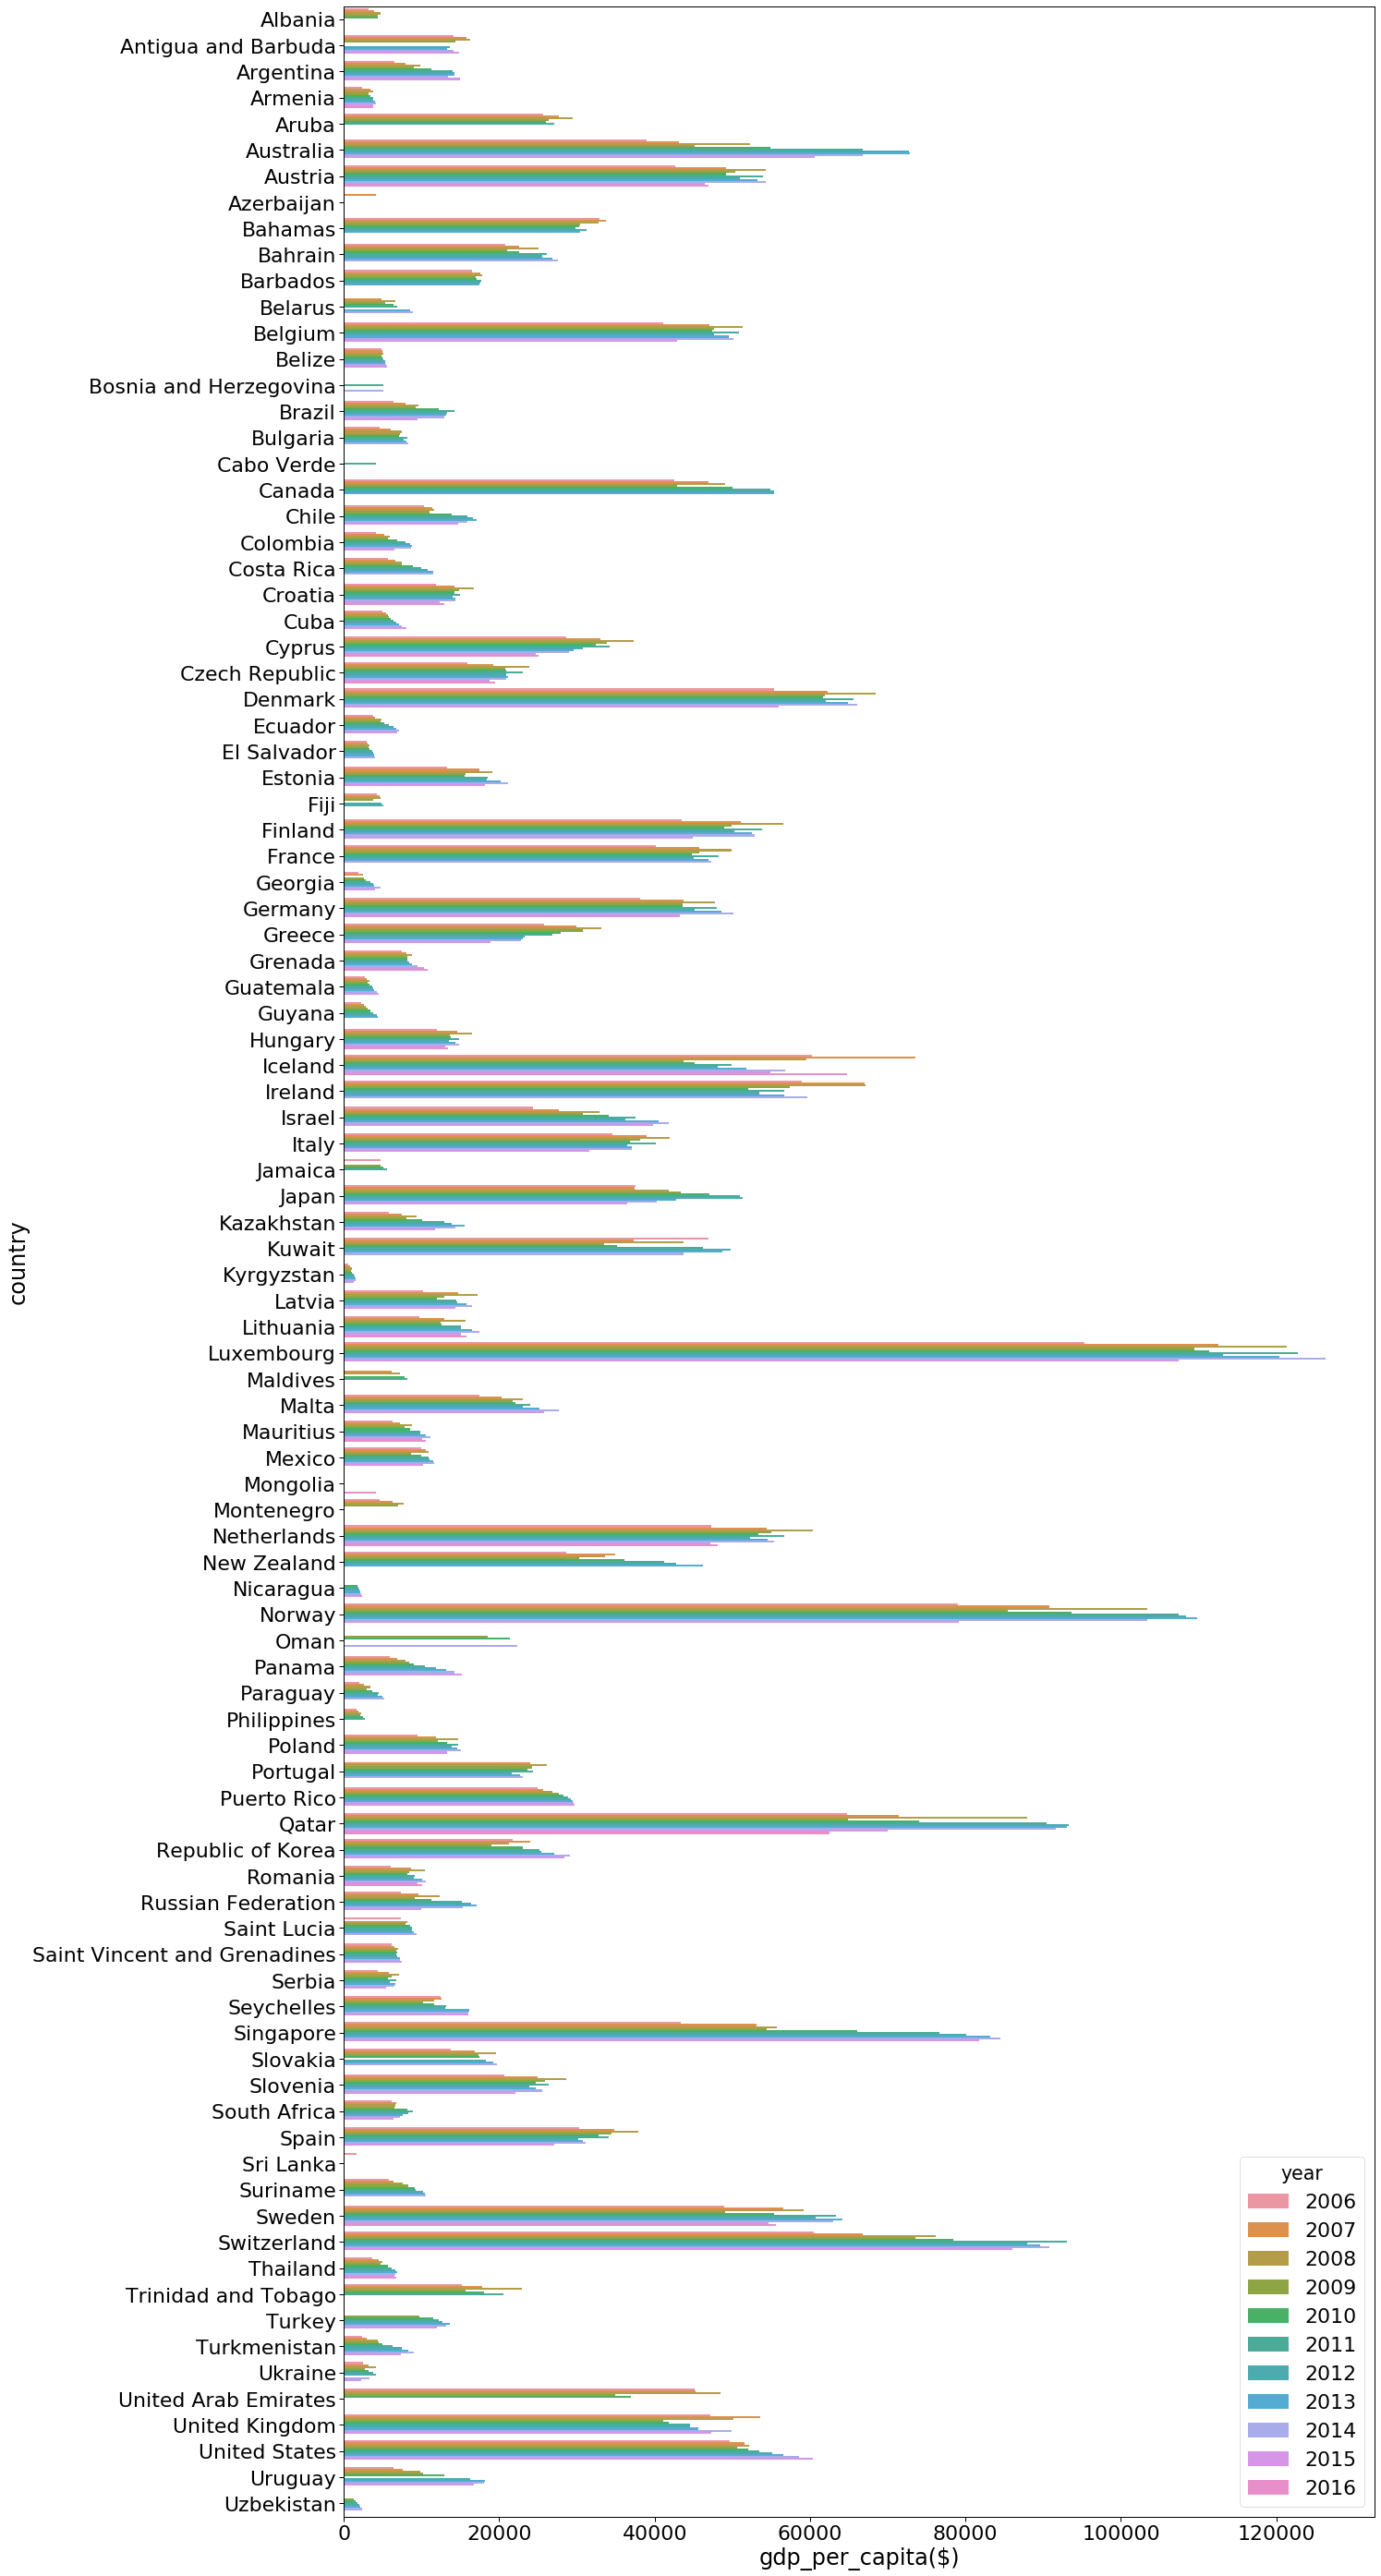

In [87]:
plt.figure(figsize=(20,50))
sns.set_context("paper", 2.5, {"lines.linewidth": 4})
sns.barplot(data=data[data['year']>2005],x='gdp_per_capita($)',y='country',hue='year')

#### Correlación entre suicidios por cada 100,000 personas e IDH

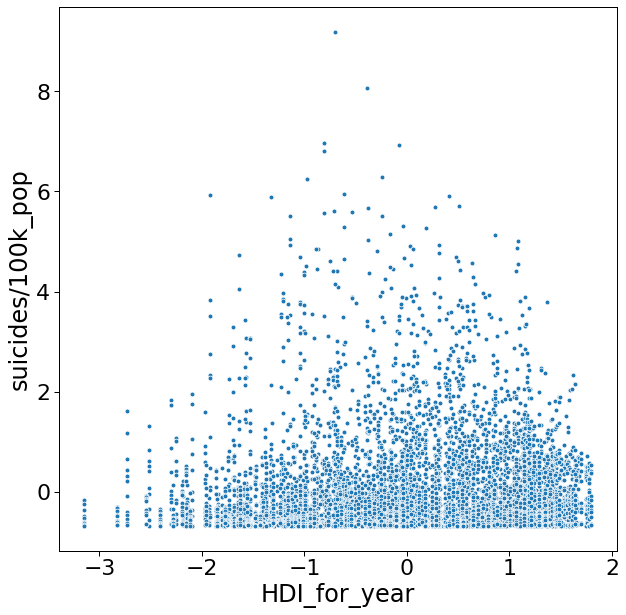

In [88]:
data_scaled = data.loc[:,['HDI_for_year','suicides/100k_pop']]
data_scaled = (data_scaled - data_scaled.mean()) / data_scaled.std()
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_scaled,x='HDI_for_year',y='suicides/100k_pop')

In [89]:
# No presenta gran correlación

#### Correlación entre suicidios por cada 100,000 personas y GDP por año

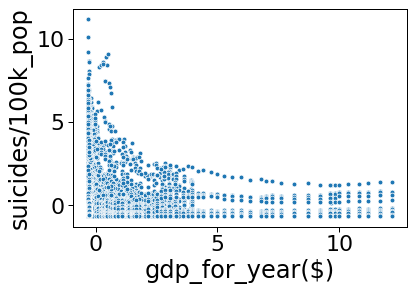

In [90]:
data_scaled = data.loc[:,['gdp_for_year($)','suicides/100k_pop']]
data_scaled = (data_scaled - data_scaled.mean()) / data_scaled.std()
sns.scatterplot(data=data_scaled,x='gdp_for_year($)',y='suicides/100k_pop')

#### Correlación entre suicidios por cada 100,000 personas y GDP per cápita

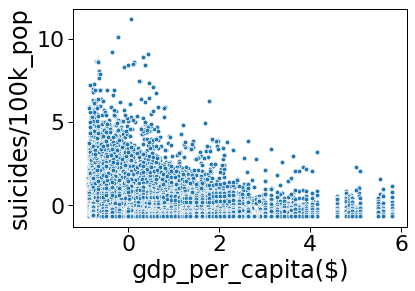

In [91]:
data_scaled = data.loc[:,['gdp_per_capita($)','suicides/100k_pop']]
data_scaled = (data_scaled - data_scaled.mean()) / data_scaled.std()
sns.scatterplot(data=data_scaled,x='gdp_per_capita($)',y='suicides/100k_pop')